Here's the content formatted in Markdown:

# 1. Installing Required Libraries

Before diving into data analysis, it's essential to install all necessary Python libraries. This includes:

* **Pandas**: For data manipulation and analysis
* **FuzzyWuzzy & RapidFuzz**: For fuzzy string matching
* **Dask**: For parallel computing with large datasets
* **PySpark**: For large-scale data processing using Apache Spark

We'll use pip to install these libraries directly within the Jupyter Notebook.

In [6]:
pip install pandas fuzzywuzzy rapidfuzz dask pyspark

Note: you may need to restart the kernel to use updated packages.


Here's the content formatted in Markdown:

# 2. Importing Libraries and Sampling Data with PySpark

In this cell, we perform the following tasks:

## Import Necessary Libraries

* **Pandas**: For data manipulation
* **Random**: For random number generation
* **PySpark**: For efficient large-scale data processing

## Initialize Spark Session
Establish a Spark session to leverage PySpark's capabilities.

## Define File Paths and Sampling Parameters

* **input_file**: Path to the input CSV containing MTA Subway Hourly Ridership data
* **output_file**: Path where the sampled data will be saved
* **sample_fraction**: Fraction of data to sample (1% in this case)
* **random_seed**: Seed for reproducibility

## Sampling the Data

* Read the CSV using PySpark
* Sample the data based on the specified fraction
* Save the sampled data to a new CSV file

In [7]:
import pandas as pd
import random

# Input and output file paths
input_file = "/kaggle/input/mta-combined/MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv"  # Replace with your file path
output_file = "MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv"

# Parameters
sample_fraction = 0.01  # 1%
chunksize = 1000000  # Number of rows to process at a time
random_seed = 42  # Fixed random seed for reproducibility

# Open the output file in write mode to save the sampled data
try:
    with open(output_file, "w") as output:
        for chunk in pd.read_csv(input_file, chunksize=chunksize, low_memory=False):  # Set low_memory to False
            # Randomly sample rows based on the fraction
            sampled_chunk = chunk.sample(frac=sample_fraction, random_state=random_seed)
            # Append sampled rows to the output file
            sampled_chunk.to_csv(output, index=False, mode='a', header=output.tell() == 0)  # Add header only once
    print(f"Sampled data saved to {output_file}")

except Exception as e:
    print(f"An error occurred: {e}")


Sampled data saved to MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv


In [8]:
import pandas as pd
import random

# Input and output file paths
input_file = "/kaggle/input/mta-combined/MTA_Subway_Origin-Destination_Ridership_Estimate__2024.csv"  # Replace with your file path
output_file = "MTA_Subway_Origin-Destination_Ridership_Estimate__2024.csv"

# Parameters
sample_fraction = 0.01  # 1%
chunksize = 1000000  # Number of rows to process at a time
random_seed = 42  # Fixed random seed for reproducibility

# Open the output file in write mode to save the sampled data
try:
    with open(output_file, "w") as output:
        for chunk in pd.read_csv(input_file, chunksize=chunksize, low_memory=False):  # Set low_memory to False
            # Randomly sample rows based on the fraction
            sampled_chunk = chunk.sample(frac=sample_fraction, random_state=random_seed)
            # Append sampled rows to the output file
            sampled_chunk.to_csv(output, index=False, mode='a', header=output.tell() == 0)  # Add header only once
    print(f"Sampled data saved to {output_file}")

except Exception as e:
    print(f"An error occurred: {e}")


Sampled data saved to MTA_Subway_Origin-Destination_Ridership_Estimate__2024.csv


In [9]:
import pandas as pd
import os

def load_csvs_and_sample(csv_list, size_limit_gb=1.5, sample_fraction=0.05):
    """
    Load CSV files into dataframes and sample large files to bring their size below the specified limit.
    
    Args:
    - csv_list (list): List of CSV file paths to load.
    - size_limit_gb (float): Size limit in GB for each CSV file.
    - sample_fraction (float): Fraction to sample for files exceeding the size limit.
    
    Returns:
    - dict: Dictionary containing dataframe names (keys) and dataframes (values).
    """
    size_limit_bytes = size_limit_gb * (1024 ** 3)  # Convert GB to bytes
    dataframes = {}  # To store the resulting dataframes
    
    for csv_path in csv_list:
        if not os.path.exists(csv_path):
            print(f"File {csv_path} does not exist.")
            continue
            
        # Get file size in bytes
        file_size_bytes = os.path.getsize(csv_path)
        print(f"Processing {os.path.basename(csv_path)}: Size = {file_size_bytes / (1024 ** 3):.2f} GB")
        
        # Load the CSV, sampling if necessary
        if file_size_bytes > size_limit_bytes:
            print(f"{os.path.basename(csv_path)} exceeds size limit. Loading and sampling...")
            df = pd.read_csv(csv_path).sample(frac=sample_fraction, random_state=42)
        else:
            print(f"{os.path.basename(csv_path)} is within size limit. Loading...")
            df = pd.read_csv(csv_path)
            
        # Add the dataframe to the dictionary with the name of the CSV (without extension)
        dataframes[os.path.splitext(os.path.basename(csv_path))[0]] = df
        
    return dataframes

# Example usage with list of CSV files
csv_files = [
    "/kaggle/input/mta-combined/MTA_Customer_Feedback_Data__2014-2019.csv",
    "/kaggle/input/mta-updated/MTA_Daily_Ridership_Data_2020_2025..csv",
    "/kaggle/input/mta-combined/MTA_Key_Performance_Indicators__2008-2021.csv",
    "/kaggle/input/mta-combined/MTA_Monthly_Ridership___Traffic_Data__Beginning_January_2008.csv",
    "/kaggle/input/mta-combined/MTA_Service_Alerts__Beginning_April_2020.csv",
    "/kaggle/input/mta-combined/MTA_Subway_Customer_Journey-Focused_Metrics__2015-2019.csv",
    "/kaggle/working/MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv",
    "/kaggle/input/mta-combined/MTA_Subway_Major_Incidents__Beginning_2020.csv",
    "/kaggle/working/MTA_Subway_Origin-Destination_Ridership_Estimate__2024.csv",
    "/kaggle/input/mta-combined/MTA_Subway_Stations.csv",
    "/kaggle/input/mta-combined/MTA_Subway_Stations_and_Complexes.csv",
    "/kaggle/input/mta-combined/MTA_Subway_Turnstile_Usage_Data__2022.csv",
    "/kaggle/input/mta-combined/MTA_Subway_and_Bus_Lost_Time_Accidents__Beginning_2021.csv"
]

# Load the dataframes
dataframes = load_csvs_and_sample(csv_files)

Processing MTA_Customer_Feedback_Data__2014-2019.csv: Size = 0.05 GB
MTA_Customer_Feedback_Data__2014-2019.csv is within size limit. Loading...
File /kaggle/input/mta-updated/MTA_Daily_Ridership_Data_2020_2025..csv does not exist.
Processing MTA_Key_Performance_Indicators__2008-2021.csv: Size = 0.00 GB
MTA_Key_Performance_Indicators__2008-2021.csv is within size limit. Loading...
Processing MTA_Monthly_Ridership___Traffic_Data__Beginning_January_2008.csv: Size = 0.00 GB
MTA_Monthly_Ridership___Traffic_Data__Beginning_January_2008.csv is within size limit. Loading...
Processing MTA_Service_Alerts__Beginning_April_2020.csv: Size = 0.09 GB
MTA_Service_Alerts__Beginning_April_2020.csv is within size limit. Loading...


/tmp/ipykernel_30/3549901102.py:34: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


Processing MTA_Subway_Customer_Journey-Focused_Metrics__2015-2019.csv: Size = 0.00 GB
MTA_Subway_Customer_Journey-Focused_Metrics__2015-2019.csv is within size limit. Loading...
Processing MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv: Size = 0.14 GB
MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv is within size limit. Loading...
Processing MTA_Subway_Major_Incidents__Beginning_2020.csv: Size = 0.00 GB
MTA_Subway_Major_Incidents__Beginning_2020.csv is within size limit. Loading...
Processing MTA_Subway_Origin-Destination_Ridership_Estimate__2024.csv: Size = 0.14 GB
MTA_Subway_Origin-Destination_Ridership_Estimate__2024.csv is within size limit. Loading...
Processing MTA_Subway_Stations.csv: Size = 0.00 GB
MTA_Subway_Stations.csv is within size limit. Loading...
Processing MTA_Subway_Stations_and_Complexes.csv: Size = 0.00 GB
MTA_Subway_Stations_and_Complexes.csv is within size limit. Loading...
Processing MTA_Subway_Turnstile_Usage_Data__2022.csv: Size = 0.71 GB
MTA_Subway_

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/05/05 15:34:21 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
15:34:26 - cmdstanpy - INFO - Chain [1] start processing
15:34:26 - cmdstanpy - INFO - Chain [1] done processing
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, c

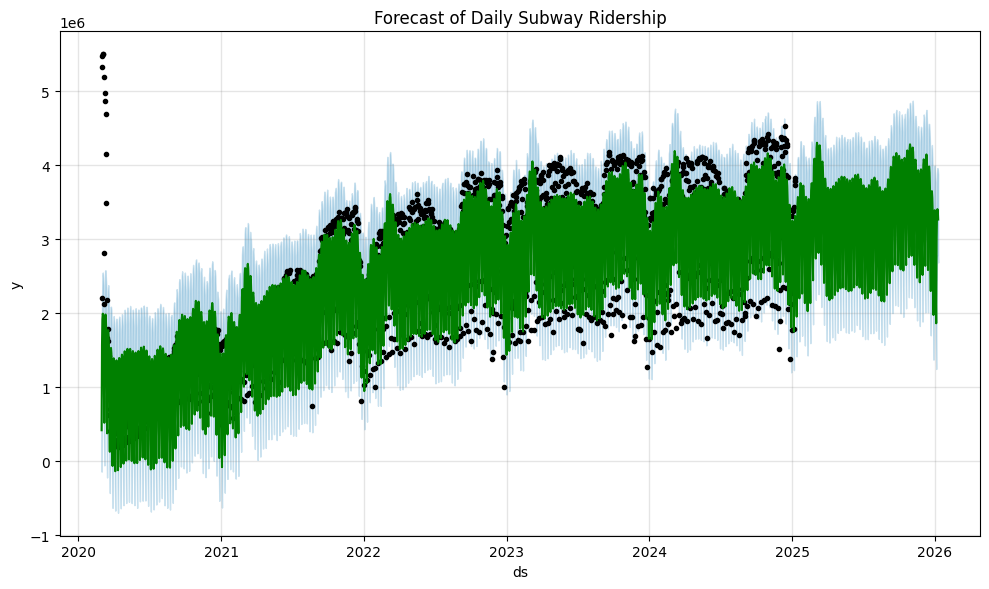

          ds        y
0 2020-03-01  2212965
1 2020-03-02  5329915
2 2020-03-03  5481103
3 2020-03-04  5498809
4 2020-03-05  5496453


In [10]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date, sum as spark_sum, month, year
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
import os

# Initialize Spark session
spark = SparkSession.builder.appName("MTA Ridership Analysis").getOrCreate()

# Example: Extract the relevant DataFrames from the dictionary
dataframes = {
    "MTA_Daily_Ridership_Data__Beginning_2020": pd.read_csv("/kaggle/input/mta-updated/MTA_Daily_Ridership_Data_2020_2025.csv"),
    "MTA_Monthly_Ridership___Traffic_Data__Beginning_January_2008": pd.read_csv("/kaggle/input/mta-combined/MTA_Monthly_Ridership___Traffic_Data__Beginning_January_2008.csv"),
    "MTA_Subway_Hourly_Ridership__Beginning_July_2020": pd.read_csv("/kaggle/working/MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv")
}

# Load data into Pandas DataFrames
daily_df = dataframes.get("MTA_Daily_Ridership_Data__Beginning_2020", None)
monthly_df = dataframes.get("MTA_Monthly_Ridership___Traffic_Data__Beginning_January_2008", None)
hourly_df = dataframes.get("MTA_Subway_Hourly_Ridership__Beginning_July_2020", None)

# --------------------
# PREPROCESS DAILY DATA
# --------------------
daily_df["Date"] = pd.to_datetime(daily_df["date"], errors='coerce')
daily_df = daily_df.set_index("Date").sort_index()

if "subways_total_estimated_ridership" in daily_df.columns:
    daily_ridership = daily_df["subways_total_estimated_ridership"].to_frame(name="daily_subway_ridership")
else:
    raise ValueError("Expected column 'Subways: Total Estimated Ridership' not found in daily_df.")

# ---------------------
# PREPROCESS MONTHLY DATA
# ---------------------
if "Month" in monthly_df.columns:
    monthly_df["Month"] = pd.to_datetime(monthly_df["Month"], errors='coerce')
else:
    raise ValueError("Expected column 'Month' not found in monthly_df.")

monthly_df = monthly_df.set_index("Month").sort_index()

if "Ridership" in monthly_df.columns:
    monthly_df = monthly_df.rename(columns={"Ridership": "monthly_total_ridership"})
else:
    raise ValueError("Expected column 'Ridership' not found in monthly_df.")

if "Agency" in monthly_df.columns:
    monthly_df = monthly_df.drop(columns=["Agency"], errors='ignore')

monthly_df = monthly_df[~monthly_df.index.duplicated(keep='first')]

if "monthly_total_ridership" in monthly_df.columns:
    monthly_df["days_in_month"] = monthly_df.index.days_in_month
    monthly_df["daily_approx_ridership"] = monthly_df["monthly_total_ridership"] / monthly_df["days_in_month"]
else:
    raise ValueError("Expected 'monthly_total_ridership' was not created successfully.")

monthly_daily = monthly_df[["daily_approx_ridership"]].resample("D").ffill()

# ---------------------
# PREPROCESS HOURLY DATA
# ---------------------
if "transit_timestamp" in hourly_df.columns:
    hourly_df["transit_timestamp"] = pd.to_datetime(hourly_df["transit_timestamp"], errors='coerce')
    hourly_df = hourly_df.set_index("transit_timestamp").sort_index()
else:
    raise ValueError("Expected column 'transit_timestamp' not found in hourly_df.")

if "ridership" in hourly_df.columns:
    hourly_daily = hourly_df.resample("D")["ridership"].sum().to_frame("hourly_aggregated_daily_ridership")
else:
    raise ValueError("Expected column 'ridership' not found in hourly_df.")


# ---------------------
# SIMPLE FORECASTING EXAMPLE WITH PROPHET
# ---------------------

prophet_df =daily_ridership.reset_index().rename(columns={"Date": "ds", "daily_subway_ridership": "y"})
prophet_df = prophet_df[["ds", "y"]].dropna()

model = Prophet()
model.fit(prophet_df)

future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)


fig = model.plot(forecast)
ax  = fig.axes[0]

# ax.lines[0] is the history, ax.lines[1] is the forecast
ax.lines[1].set_color("green")

ax.set_title("Forecast of Daily Subway Ridership")
plt.tight_layout()
plt.show()

print(prophet_df.head())

spark.stop()

# 2. Importing Libraries and Sampling Data with PySpark

In this cell, we perform the following tasks:

## Import Necessary Libraries

* **Pandas**: For data manipulation
* **Random**: For random number generation
* **PySpark**: For efficient large-scale data processing

## Initialize Spark Session
Establish a Spark session to leverage PySpark's capabilities.

## Define File Paths and Sampling Parameters

* **input_file**: Path to the input CSV containing MTA Subway Hourly Ridership data
* **output_file**: Path where the sampled data will be saved
* **sample_fraction**: Fraction of data to sample (1% in this case)
* **random_seed**: Seed for reproducibility

## Sampling the Data

* Read the CSV using PySpark
* Sample the data based on the specified fraction
* Save the sampled data to a new CSV file

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
import logging

# Configure plotting aesthetics
sns.set(style="whitegrid")
%matplotlib inline

In [12]:
# Define the list of CSV files to load
def load_csvs_and_sample(csv_list, size_limit_gb=1.5, sample_fraction=0.05):
    """
    Load CSV files into dataframes and sample large files to bring their size below the specified limit.

    Args:
    - csv_list (list): List of CSV file paths to load.
    - size_limit_gb (float): Size limit in GB for each CSV file.
    - sample_fraction (float): Fraction to sample for files exceeding the size limit.

    Returns:
    - dict: Dictionary containing dataframe names (keys) and dataframes (values).
    """
    size_limit_bytes = size_limit_gb * (1024 ** 3)  # Convert GB to bytes
    dataframes = {}  # To store the resulting dataframes

    for csv_path in csv_list:
        if not os.path.exists(csv_path):
            print(f"File {csv_path} does not exist.")
            continue

        # Get file size in bytes
        file_size_bytes = os.path.getsize(csv_path)

        print(f"Processing {os.path.basename(csv_path)}: Size = {file_size_bytes / (1024 ** 3):.2f} GB")

        # Load the CSV, sampling if necessary
        if file_size_bytes > size_limit_bytes:
            print(f"{os.path.basename(csv_path)} exceeds size limit. Loading and sampling...")
            df = pd.read_csv(csv_path).sample(frac=sample_fraction, random_state=42)
        else:
            print(f"{os.path.basename(csv_path)} is within size limit. Loading...")
            df = pd.read_csv(csv_path)

        # Add the dataframe to the dictionary with the name of the CSV (without extension)
        dataframes[os.path.splitext(os.path.basename(csv_path))[0]] = df

    return dataframes
    
csv_files = [
    "/kaggle/working/MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv",
    "/kaggle/working/MTA_Subway_Origin-Destination_Ridership_Estimate__2024.csv",
    "/kaggle/input/mta-combined/MTA_Service_Alerts__Beginning_April_2020.csv",
    "/kaggle/input/mta-combined/MTA_Subway_Stations_and_Complexes.csv"
]

# Load the dataframes using the previously defined function
# Ensure that 'load_csvs_and_sample' is defined as per your earlier code
dataframes = load_csvs_and_sample(csv_files)

# Verify loaded dataframes
for name, df in dataframes.items():
    print(f"{name}: {df.shape}")

Processing MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv: Size = 0.14 GB
MTA_Subway_Hourly_Ridership__Beginning_July_2020.csv is within size limit. Loading...
Processing MTA_Subway_Origin-Destination_Ridership_Estimate__2024.csv: Size = 0.14 GB
MTA_Subway_Origin-Destination_Ridership_Estimate__2024.csv is within size limit. Loading...
Processing MTA_Service_Alerts__Beginning_April_2020.csv: Size = 0.09 GB
MTA_Service_Alerts__Beginning_April_2020.csv is within size limit. Loading...
Processing MTA_Subway_Stations_and_Complexes.csv: Size = 0.00 GB
MTA_Subway_Stations_and_Complexes.csv is within size limit. Loading...
MTA_Subway_Hourly_Ridership__Beginning_July_2020: (1054764, 12)
MTA_Subway_Origin-Destination_Ridership_Estimate__2024: (762945, 16)
MTA_Service_Alerts__Beginning_April_2020: (351631, 9)
MTA_Subway_Stations_and_Complexes: (445, 16)


/tmp/ipykernel_30/1788377370.py:33: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


In [13]:
# Access the dataframe
df_ridership = dataframes['MTA_Subway_Hourly_Ridership__Beginning_July_2020']

# Get dataframe info
print("\nDataframe Info:")
print(df_ridership.info())

# Summary statistics
print("\nSummary Statistics:")
print(df_ridership.describe())

# Summary of missing values
print("\nMissing Values per Column:")
print(df_ridership.isnull().sum())


Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054764 entries, 0 to 1054763
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   transit_timestamp    1054764 non-null  object 
 1   transit_mode         1054764 non-null  object 
 2   station_complex_id   1054764 non-null  object 
 3   station_complex      1054764 non-null  object 
 4   borough              1054764 non-null  object 
 5   payment_method       1054764 non-null  object 
 6   fare_class_category  1054764 non-null  object 
 7   ridership            1054764 non-null  int64  
 8   transfers            1054764 non-null  int64  
 9   latitude             1054764 non-null  float64
 10  longitude            1054764 non-null  float64
 11  Georeference         1054764 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 96.6+ MB
None

Summary Statistics:
          ridership     transfers      latitude     l


Data Types Before Conversion:
transit_timestamp       object
transit_mode            object
station_complex_id      object
station_complex         object
borough                 object
payment_method          object
fare_class_category     object
ridership                int64
transfers                int64
latitude               float64
longitude              float64
Georeference            object
dtype: object

Data Types After Conversion:
transit_timestamp      datetime64[ns]
transit_mode                   object
station_complex_id             object
station_complex                object
borough                        object
payment_method                 object
fare_class_category            object
ridership                       int64
transfers                       int64
latitude                      float64
longitude                     float64
Georeference                   object
dtype: object

Number of NaT in 'transit_timestamp': 0

Number of Duplicate Rows: 0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


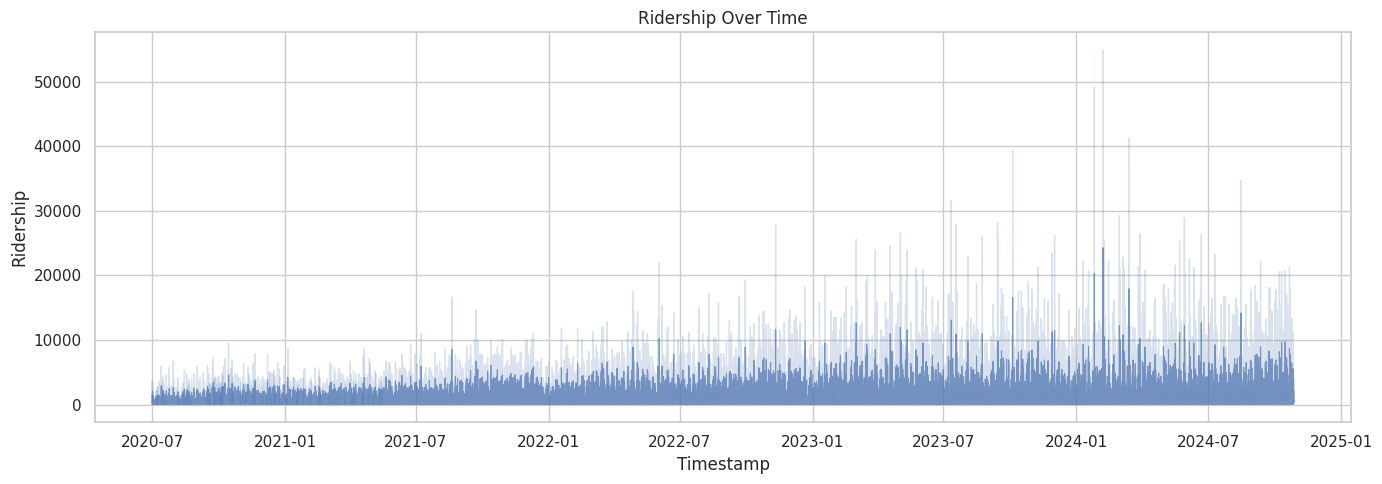

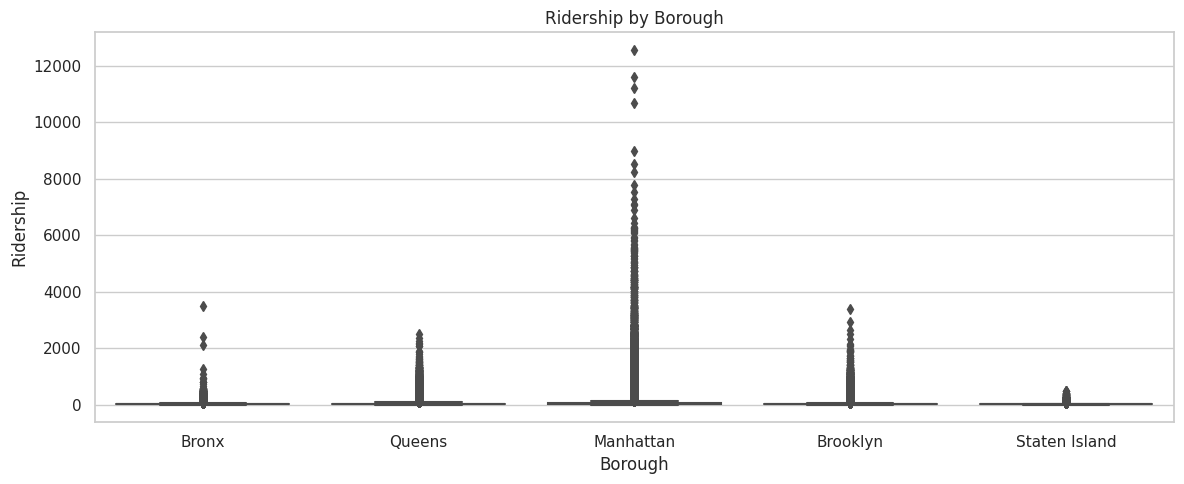

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


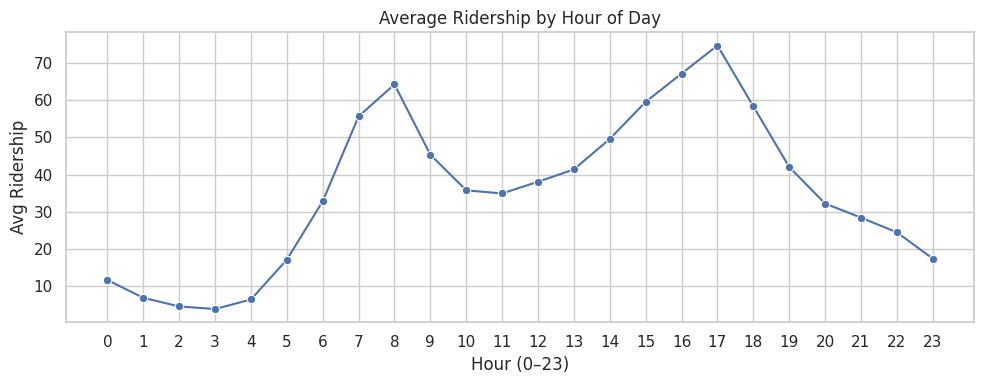

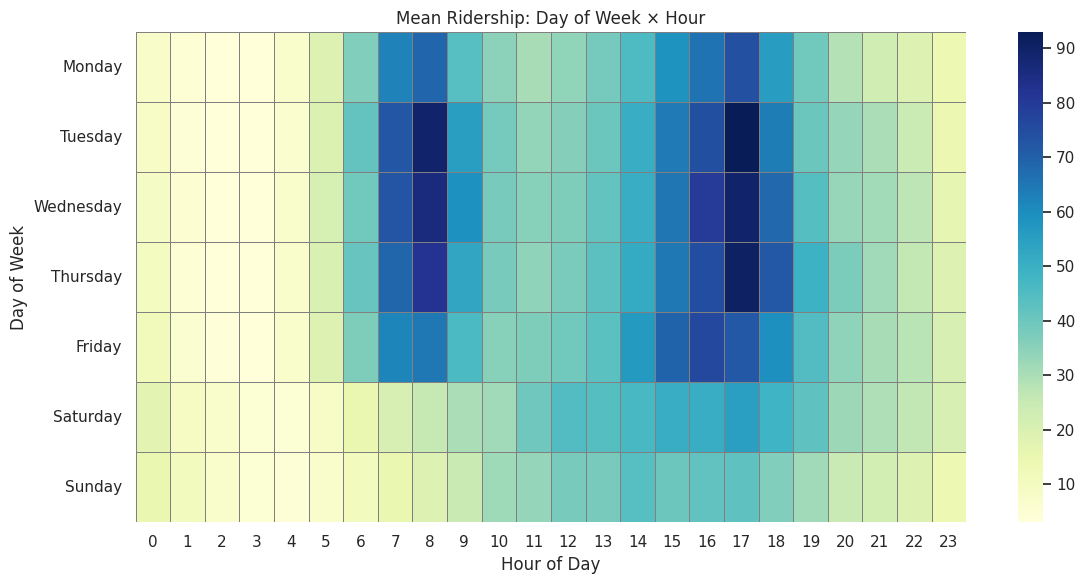

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ——————————————————————————————————————————————
# 1️⃣  Load & clean
# ——————————————————————————————————————————————
print("\nData Types Before Conversion:")
print(df_ridership.dtypes)

# Convert timestamp
df_ridership['transit_timestamp'] = pd.to_datetime(
    df_ridership['transit_timestamp'],
    errors='coerce'
)

print("\nData Types After Conversion:")
print(df_ridership.dtypes)

# Drop bad timestamps
num_nat = df_ridership['transit_timestamp'].isna().sum()
print(f"\nNumber of NaT in 'transit_timestamp': {num_nat}")
if num_nat > 0:
    df_ridership.dropna(subset=['transit_timestamp'], inplace=True)
    print(f"Dropped {num_nat} rows with invalid 'transit_timestamp'")

# Remove duplicates
num_dup = df_ridership.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {num_dup}")
if num_dup > 0:
    df_ridership.drop_duplicates(inplace=True)
    print(f"Removed {num_dup} duplicate rows")

# Normalize station_complex_id
df_ridership['station_complex_id'] = df_ridership['station_complex_id'].astype(str)

# ——————————————————————————————————————————————
# 2️⃣  Feature engineering for time‐based plots
# ——————————————————————————————————————————————
df_ridership['hour']       = df_ridership['transit_timestamp'].dt.hour
df_ridership['date']       = df_ridership['transit_timestamp'].dt.date
df_ridership['day_of_week'] = df_ridership['transit_timestamp'].dt.day_name()
df_ridership['is_weekend'] = df_ridership['day_of_week'].isin(['Saturday','Sunday'])

# ——————————————————————————————————————————————
# 3️⃣  Plots
# ——————————————————————————————————————————————

# 3.1 Ridership Over Time
plt.figure(figsize=(14,5))
sns.lineplot(
    data=df_ridership,
    x='transit_timestamp', y='ridership',
    estimator='sum',         # daily total if you resample below
    lw=0.8, alpha=0.7
)
plt.title('Ridership Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Ridership')
plt.tight_layout()
plt.show()


# 3.3 Ridership by Borough
if 'borough' in df_ridership.columns:
    plt.figure(figsize=(12,5))
    sns.boxplot(
        data=df_ridership,
        x='borough', y='ridership'
    )
    plt.title('Ridership by Borough')
    plt.xlabel('Borough')
    plt.ylabel('Ridership')
    plt.tight_layout()
    plt.show()

# 3.4 Average Ridership by Hour of Day
hourly = df_ridership.groupby('hour')['ridership'].mean()
plt.figure(figsize=(10,4))
sns.lineplot(
    x=hourly.index, y=hourly.values,
    marker='o'
)
plt.title('Average Ridership by Hour of Day')
plt.xlabel('Hour (0–23)')
plt.ylabel('Avg Ridership')
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()

# 3.5 Hour × Day‐of‐Week Heatmap
pivot = df_ridership.pivot_table(
    index='day_of_week',
    columns='hour',
    values='ridership',
    aggfunc='mean'
).reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)

plt.figure(figsize=(12,6))
sns.heatmap(
    pivot,
    cmap='YlGnBu',
    linewidths=0.5,
    linecolor='gray'
)
plt.title('Mean Ridership: Day of Week × Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762945 entries, 0 to 762944
Data columns (total 16 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Year                              762945 non-null  int64  
 1   Month                             762945 non-null  int64  
 2   Day of Week                       762945 non-null  object 
 3   Hour of Day                       762945 non-null  int64  
 4   Timestamp                         762945 non-null  object 
 5   Origin Station Complex ID         762945 non-null  int64  
 6   Origin Station Complex Name       762945 non-null  object 
 7   Origin Latitude                   762945 non-null  float64
 8   Origin Longitude                  762945 non-null  float64
 9   Destination Station Complex ID    762945 non-null  int64  
 10  Destination Station Complex Name  762945 non-null  object 
 11  Destination Latitude              7

None


Missing‑data matrix:


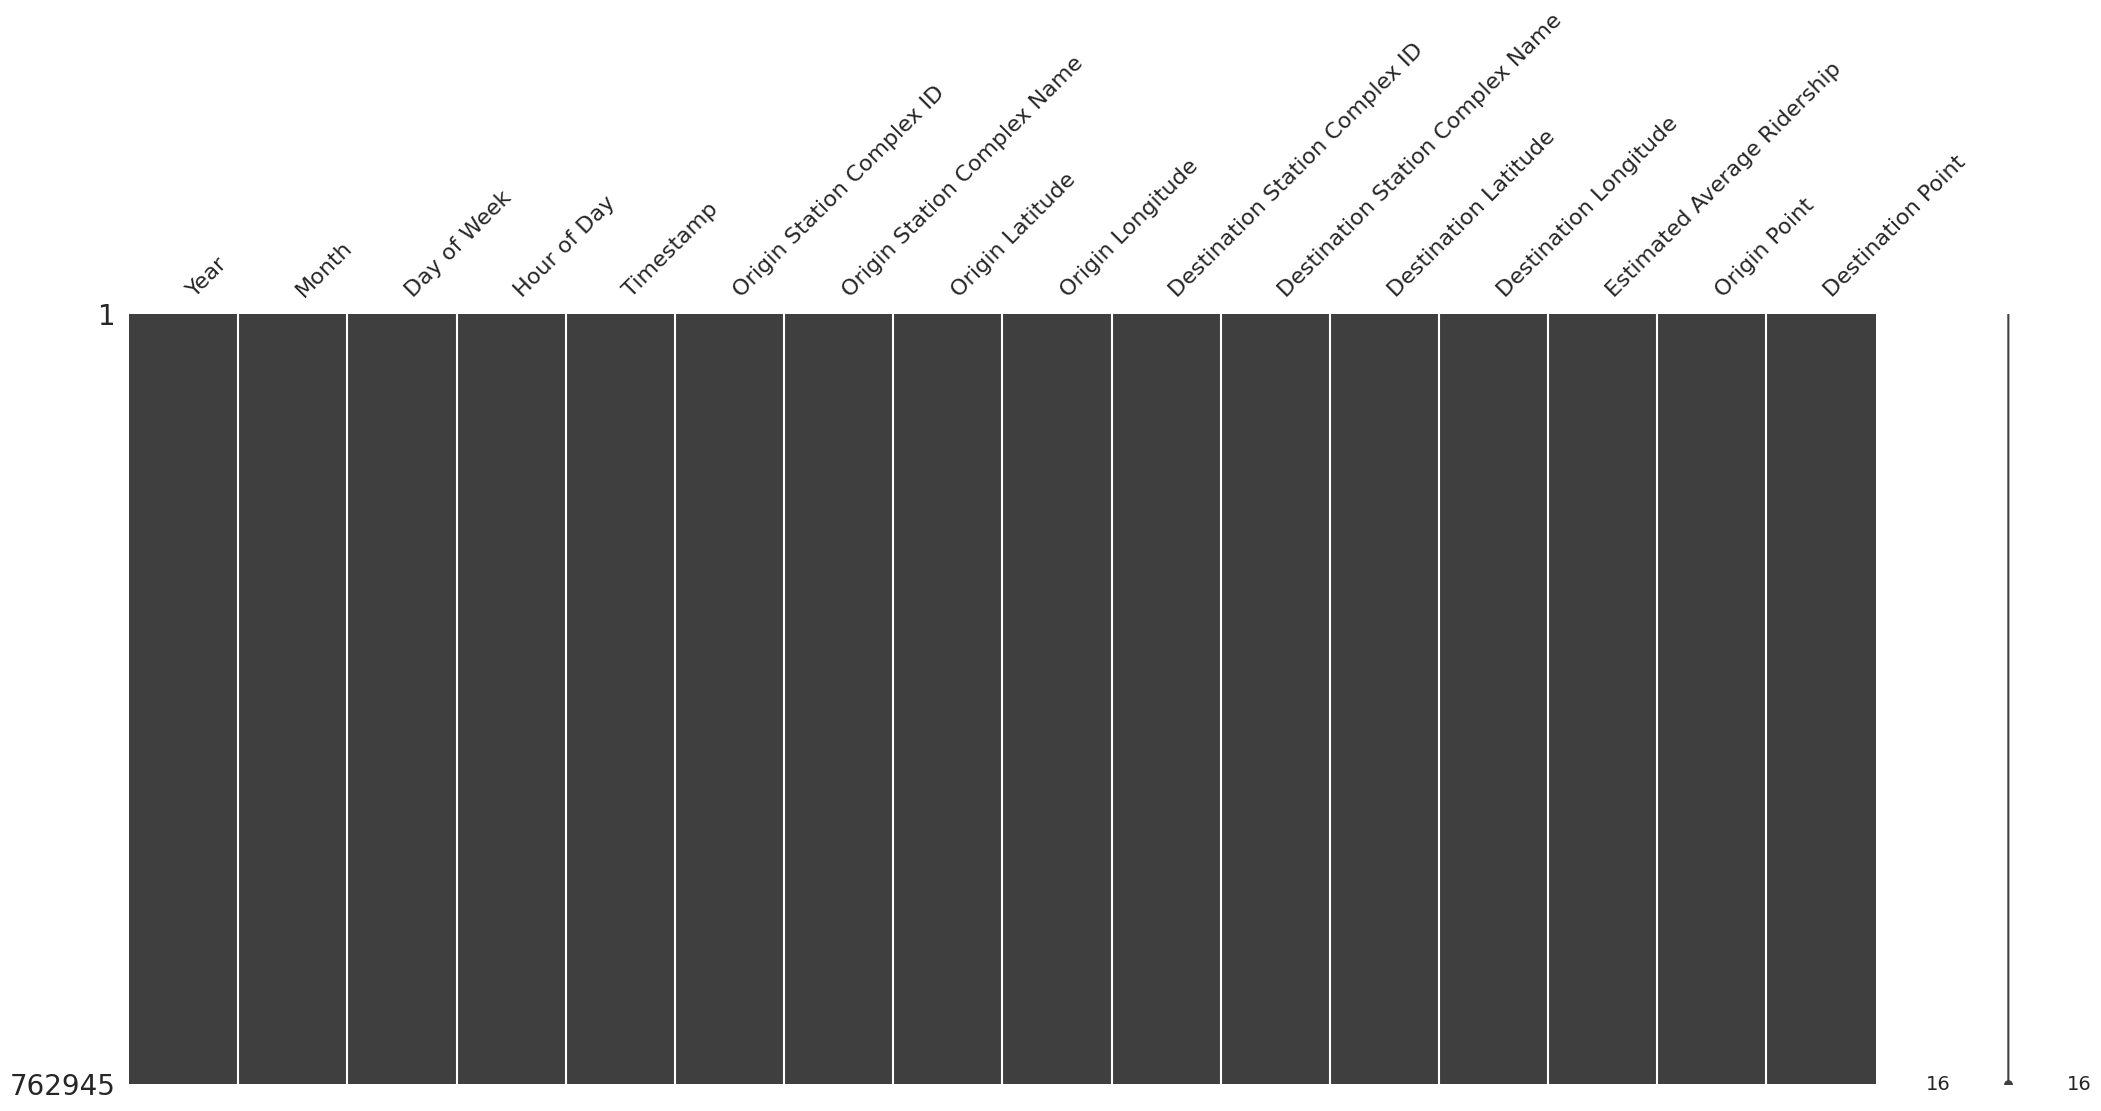


Missing values per column:
Year                                0
Month                               0
Day of Week                         0
Hour of Day                         0
Timestamp                           0
Origin Station Complex ID           0
Origin Station Complex Name         0
Origin Latitude                     0
Origin Longitude                    0
Destination Station Complex ID      0
Destination Station Complex Name    0
Destination Latitude                0
Destination Longitude               0
Estimated Average Ridership         0
Origin Point                        0
Destination Point                   0
dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


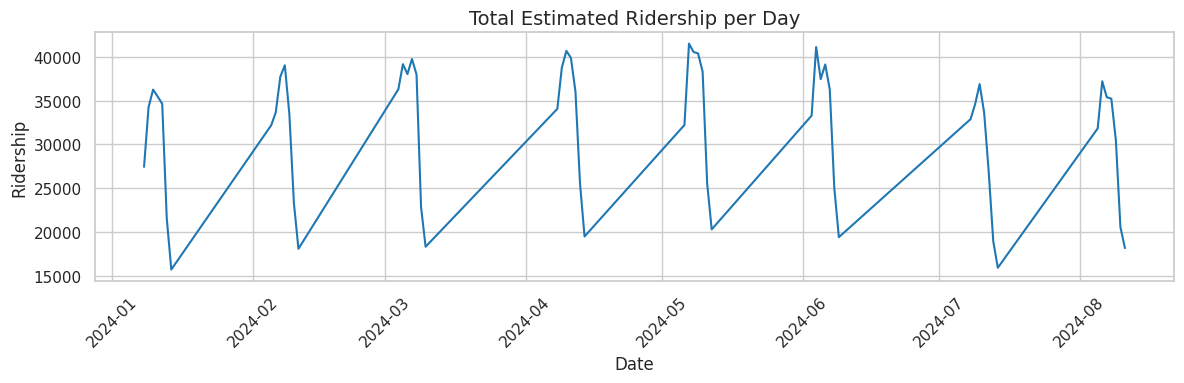

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


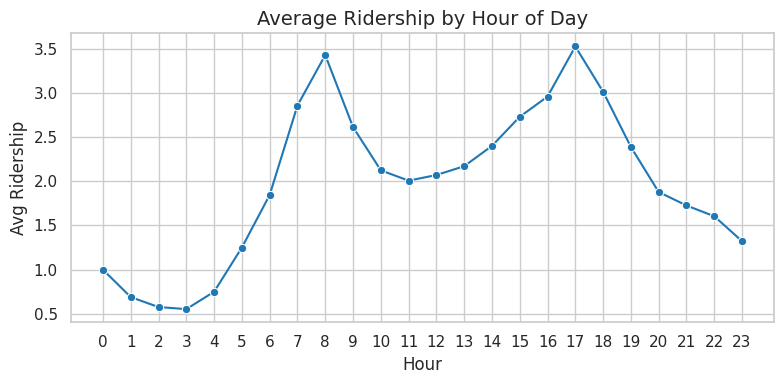

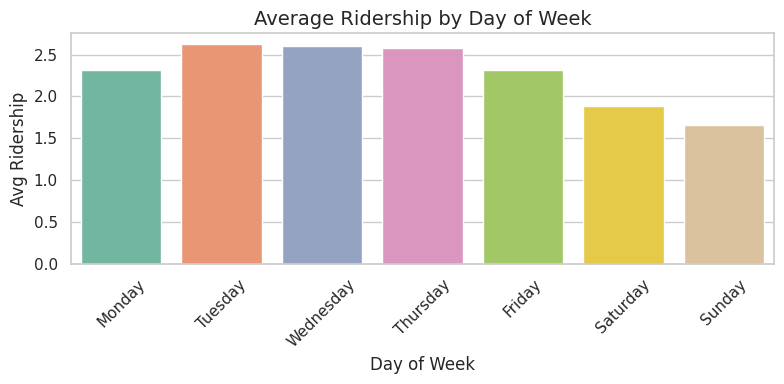

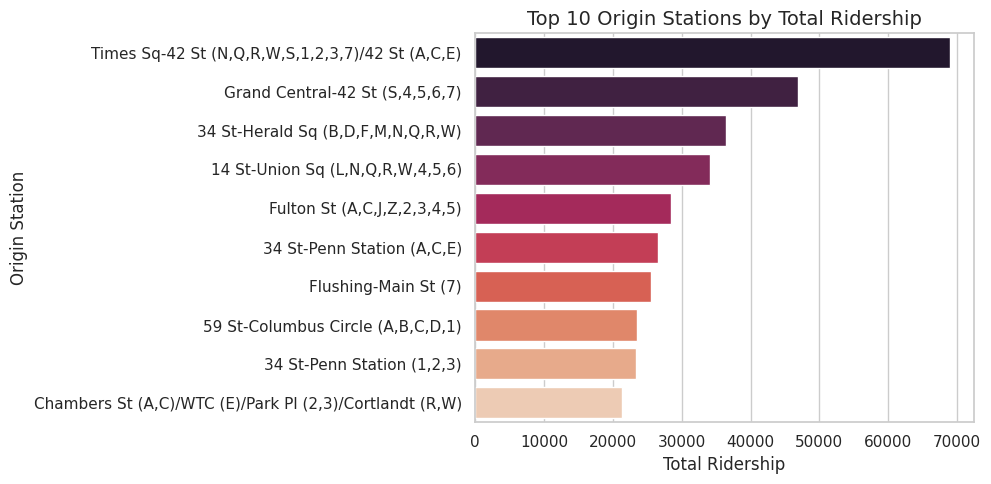

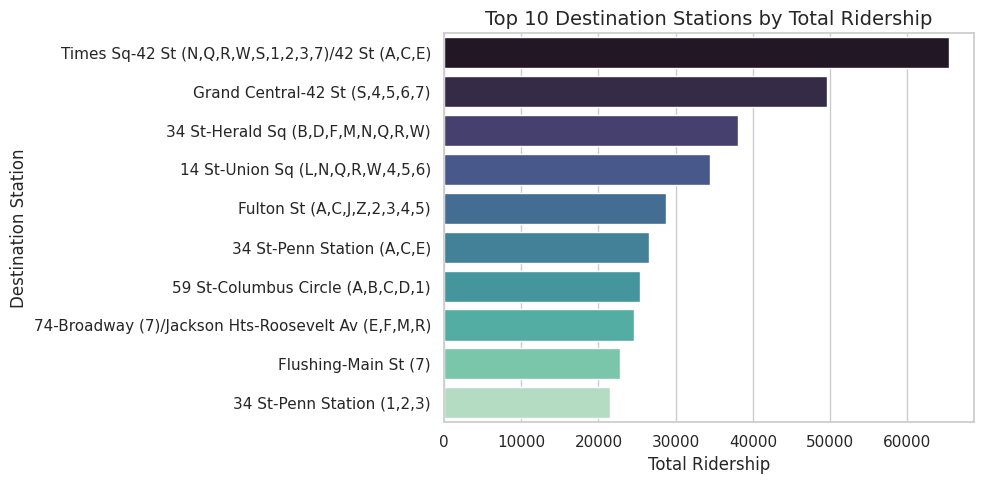

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


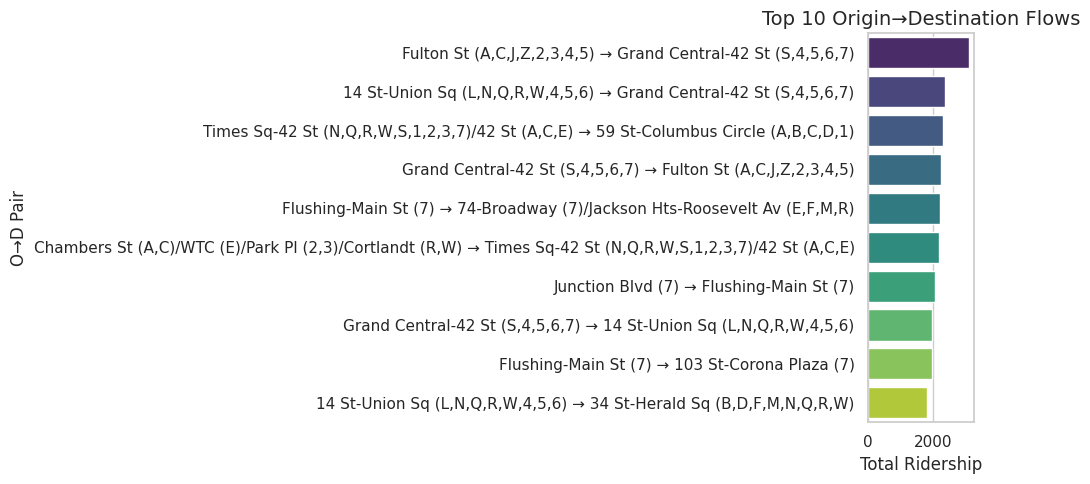

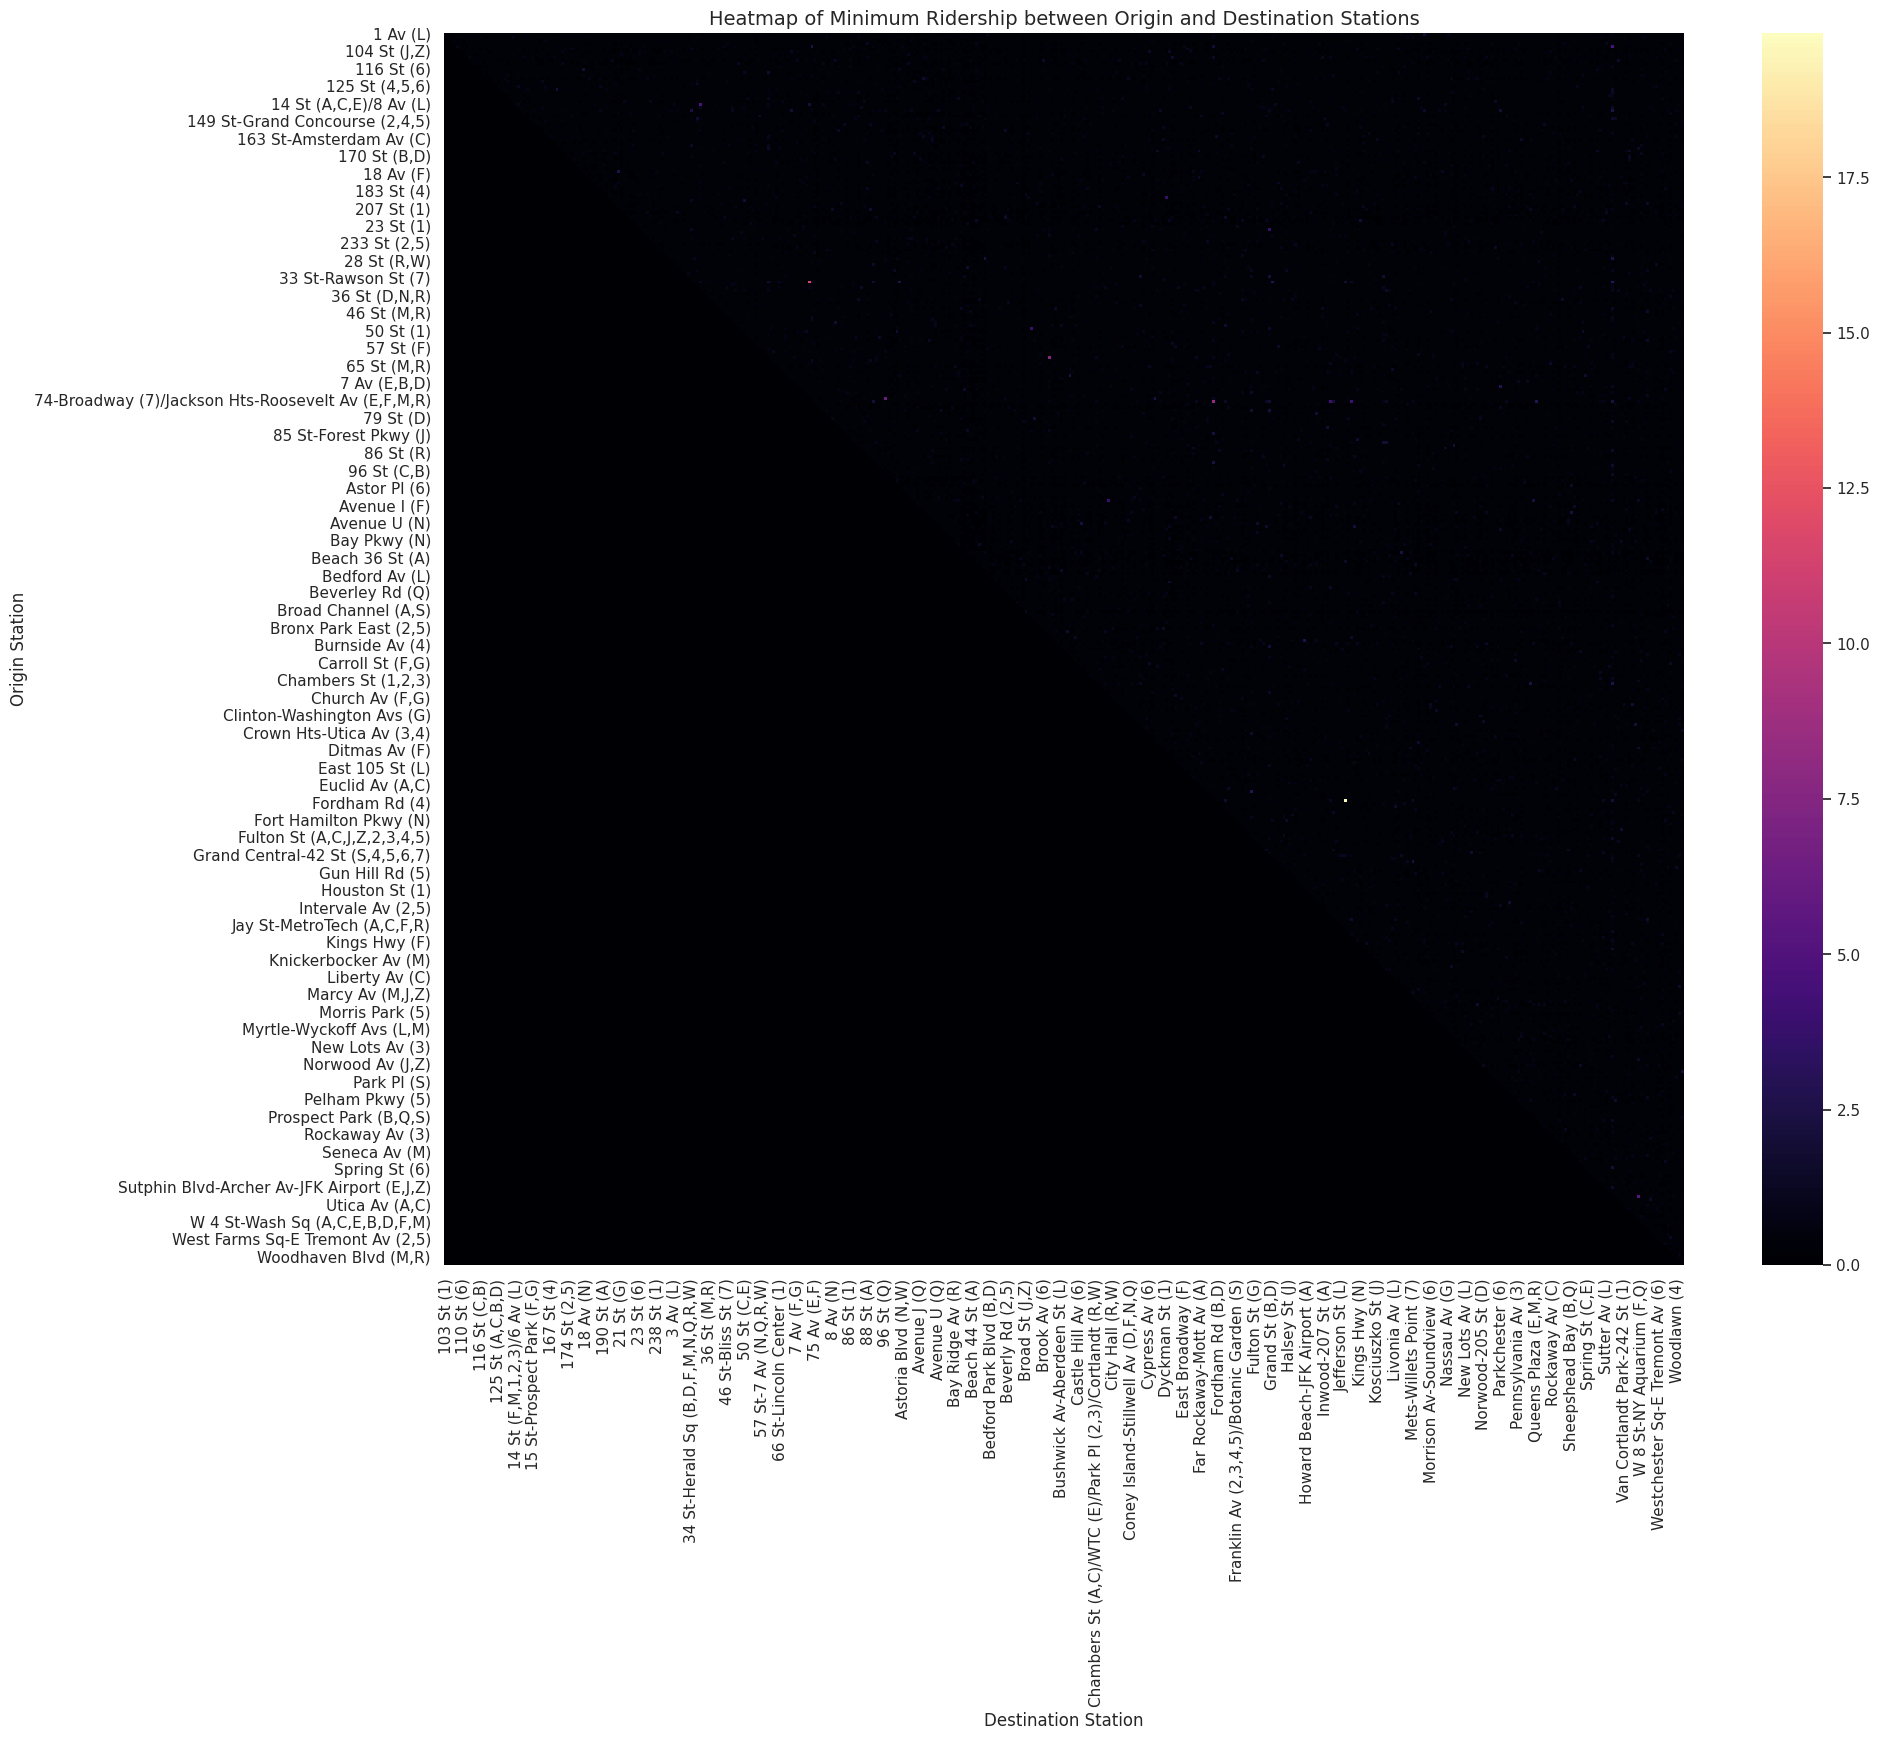

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# ——————————————————————————————————————————————
# 0) Style
# ——————————————————————————————————————————————
sns.set_theme(style="whitegrid", palette="tab10")
plt.rc("axes", titlesize=14, labelsize=12)

# ——————————————————————————————————————————————
# 1) Load & inspect
# ——————————————————————————————————————————————
df_od = dataframes['MTA_Subway_Origin-Destination_Ridership_Estimate__2024'].copy()

print("\nDataFrame Info:")
display(df_od.info())

print("\nMissing‑data matrix:")
msno.matrix(df_od)
plt.show()

print("\nMissing values per column:")
print(df_od.isnull().sum())

# ——————————————————————————————————————————————
# 2) Clean up
# ——————————————————————————————————————————————
# Fill or drop ridership nulls
if df_od['Estimated Average Ridership'].isnull().any():
    median = df_od['Estimated Average Ridership'].median()
    df_od['Estimated Average Ridership'].fillna(median, inplace=True)

# Parse timestamp
df_od['Timestamp'] = pd.to_datetime(df_od['Timestamp'], errors='coerce')
df_od.dropna(subset=['Timestamp'], inplace=True)

# Dedupe
df_od.drop_duplicates(inplace=True)

# IDs as strings
df_od['Origin Station Complex ID']      = df_od['Origin Station Complex ID'].astype(str)
df_od['Destination Station Complex ID'] = df_od['Destination Station Complex ID'].astype(str)

# ——————————————————————————————————————————————
# 3) Feature engineering
# ——————————————————————————————————————————————
df_od['date']        = df_od['Timestamp'].dt.date
df_od['year']        = df_od['Timestamp'].dt.year
df_od['month']       = df_od['Timestamp'].dt.month
df_od['day_of_week'] = df_od['Timestamp'].dt.day_name()
df_od['hour']        = df_od['Timestamp'].dt.hour

# Pre‑aggregate for heavy plots
# total ridership per day
daily_sum = df_od.groupby('date')['Estimated Average Ridership'].sum()
# avg ridership by hour
hourly_avg = df_od.groupby('hour')['Estimated Average Ridership'].mean()
# avg ridership by day of week
dow_avg = df_od.groupby('day_of_week')['Estimated Average Ridership'].mean()\
               .reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
# total per origin/dest
origin_tot = df_od.groupby('Origin Station Complex Name')['Estimated Average Ridership'].sum()
dest_tot   = df_od.groupby('Destination Station Complex Name')['Estimated Average Ridership'].sum()

# top O‑D pairs
od_pairs = (
    df_od.groupby(
        ['Origin Station Complex Name','Destination Station Complex Name']
    )['Estimated Average Ridership']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# ——————————————————————————————————————————————
# 4) Exploratory plots
# ——————————————————————————————————————————————

# 4.1 Daily time series
plt.figure(figsize=(12,4))
sns.lineplot(x=daily_sum.index, y=daily_sum.values)
plt.title("Total Estimated Ridership per Day")
plt.xlabel("Date")
plt.ylabel("Ridership")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4.2 Hourly profile
plt.figure(figsize=(8,4))
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, marker='o')
plt.title("Average Ridership by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Avg Ridership")
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()

# 4.3 Weekday profile
plt.figure(figsize=(8,4))
sns.barplot(x=dow_avg.index, y=dow_avg.values, palette="Set2")
plt.title("Average Ridership by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Avg Ridership")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 4.5 Top 10 origins
top_orig = origin_tot.nlargest(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_orig.values, y=top_orig.index, palette="rocket")
plt.title("Top 10 Origin Stations by Total Ridership")
plt.xlabel("Total Ridership")
plt.ylabel("Origin Station")
plt.tight_layout()
plt.show()

# 4.6 Top 10 destinations
top_dest = dest_tot.nlargest(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_dest.values, y=top_dest.index, palette="mako")
plt.title("Top 10 Destination Stations by Total Ridership")
plt.xlabel("Total Ridership")
plt.ylabel("Destination Station")
plt.tight_layout()
plt.show()

# 4.7 Top 10 O‑D pairs
plt.figure(figsize=(10,5))
sns.barplot(
    x=od_pairs.values,
    y=[f"{o} → {d}" for o,d in od_pairs.index],
    palette="viridis"
)
plt.title("Top 10 Origin→Destination Flows")
plt.xlabel("Total Ridership")
plt.ylabel("O→D Pair")
plt.tight_layout()
plt.show()





# # Heatmap of Ridership between Origin and Destination
# pivot_table = df_od.pivot_table(values='Estimated Average Ridership',
#                                index='Origin Station Complex Name',
#                                columns='Destination Station Complex Name',
#                                aggfunc='sum',
#                                fill_value=0)

# vmax_99 = np.percentile(pivot_table.values.flatten(),80)

# plt.figure(figsize=(20,16))

# # Use log normalization to spread out values, but cap at the 99th percentile
# norm = LogNorm(vmin=1, vmax=vmax_99)

# sns.heatmap(
#     pivot_table,
#     cmap='magma',           # high‑contrast sequential map
#     norm=norm,              # log scaling
#     cbar_kws={
#         'label': 'Estimated Ridership (log scale)', 
#         'shrink': 0.8
#     },
#     linewidths=0.5,         # optional: grid lines between cells
#     linecolor='gray'
# )

# plt.title('Heatmap of Ridership between Origin and Destination Stations\n(Log‑scaled & 99th‑percentile cap)')
# plt.xlabel('Destination Station')
# plt.ylabel('Origin Station')
# plt.xticks(rotation=90, fontsize=8)
# plt.yticks(fontsize=8)
# plt.tight_layout()
# plt.show()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new DataFrame where each origin-destination pair is represented in both directions
df_od_copy = df_od.copy()

# Rename columns for clarity
df_od_copy['Pair Key'] = df_od_copy.apply(
    lambda row: tuple(sorted([row['Origin Station Complex Name'], row['Destination Station Complex Name']])),
    axis=1
)

# Group by unordered station pairs and take the minimum ridership between the two directions
min_ridership = df_od_copy.groupby('Pair Key')['Estimated Average Ridership'].min().reset_index()

# Now convert this pair into two columns again for pivoting
min_ridership[['Origin', 'Destination']] = pd.DataFrame(min_ridership['Pair Key'].tolist(), index=min_ridership.index)

# Create pivot table
pivot_table = min_ridership.pivot_table(values='Estimated Average Ridership',
                                        index='Origin',
                                        columns='Destination',
                                        fill_value=0)

# Plot heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(pivot_table, cmap='magma')
plt.title('Heatmap of Minimum Ridership between Origin and Destination Stations')
plt.xlabel('Destination Station')
plt.ylabel('Origin Station')
plt.show()

In [16]:
#3.3. MTA_Service_Alerts__Beginning_April_2020

First 5 rows:


,Alert ID,Event ID,Update Number,Date,Agency,Status Label,Affected,Header,Description
0,345264,167130,0,08/26/2024 11:33:00 AM,NYCT Subway,delays,6,Northbound 6 trains are delayed while we addre...,NaN
1,345139,167055,0,08/25/2024 10:47:00 PM,NYCT Subway,delays,A,Southbound A trains are delayed while FDNY res...,NaN
2,344558,166767,0,08/23/2024 02:44:00 PM,BT,planned-work,Throgs Neck Bridge,Throgs Neck Bridge: Planned work; Bronx bound ...,NaN
3,342848,165879,0,08/18/2024 11:12:00 AM,BT,delays,Marine Parkway Bridge,MPB: Vehicle collision; Brooklyn bound blockin...,NaN
4,342668,165788,0,08/17/2024 12:11:00 PM,NYCT Subway,delays,N,Northbound N trains are delayed while we addre...,NaN



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351631 entries, 0 to 351630
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Alert ID       351631 non-null  int64 
 1   Event ID       351631 non-null  int64 
 2   Update Number  351631 non-null  int64 
 3   Date           351631 non-null  object
 4   Agency         351631 non-null  object
 5   Status Label   351631 non-null  object
 6   Affected       350159 non-null  object
 7   Header         351489 non-null  object
 8   Description    123665 non-null  object
dtypes: int64(3), object(6)
memory usage: 24.1+ MB
None

Summary statistics:
             Alert ID       Event ID  Update Number                    Date  \
count   351631.000000  351631.000000  351631.000000                  351631   
unique            NaN            NaN            NaN                  302876   
top               NaN            NaN            NaN  01/29/2022 05:00:00 AM

/tmp/ipykernel_30/1333589462.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_alerts['Date'] = pd.to_datetime(df_alerts['Date'], errors='coerce')


<Figure size 1000x300 with 0 Axes>

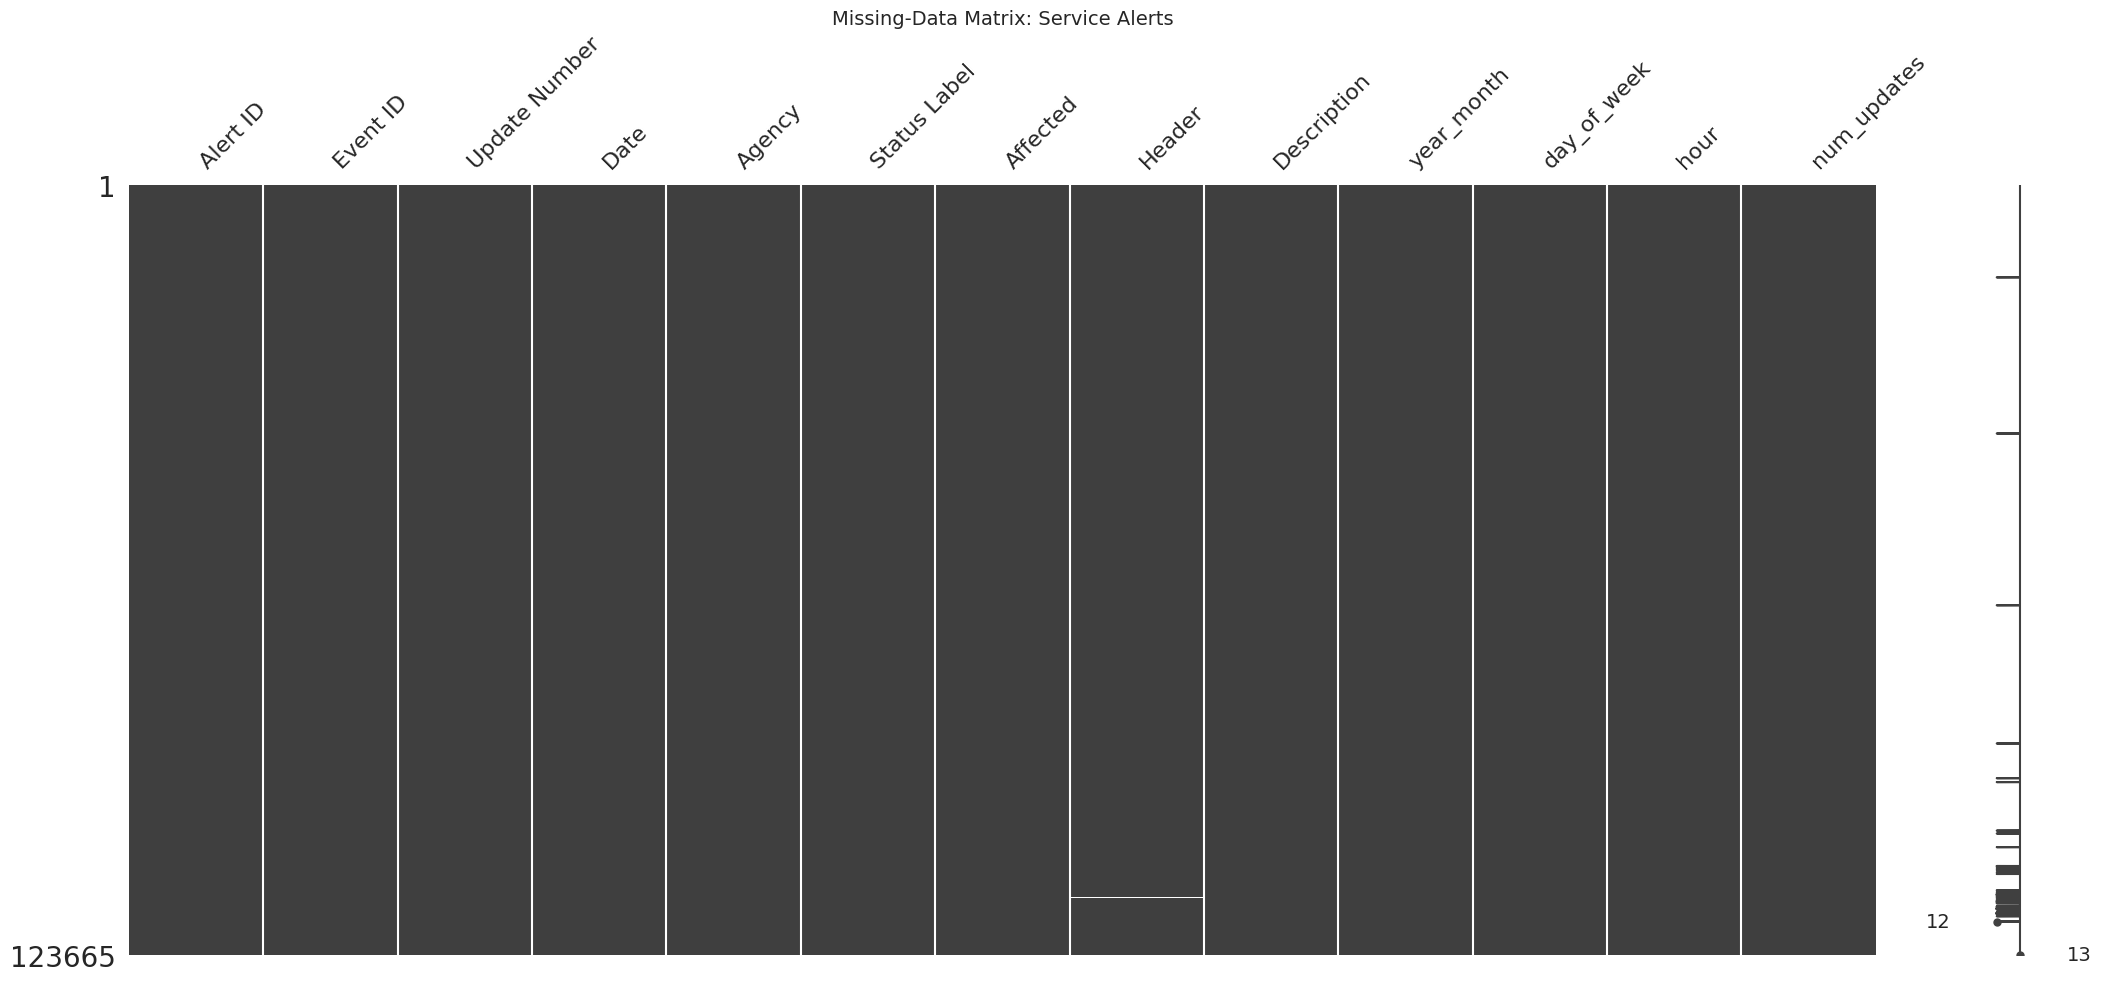


Missing values per column:
Alert ID           0
Event ID           0
Update Number      0
Date               0
Agency             0
Status Label       0
Affected           0
Header           118
Description        0
year_month         0
day_of_week        0
hour               0
num_updates        0
dtype: int64


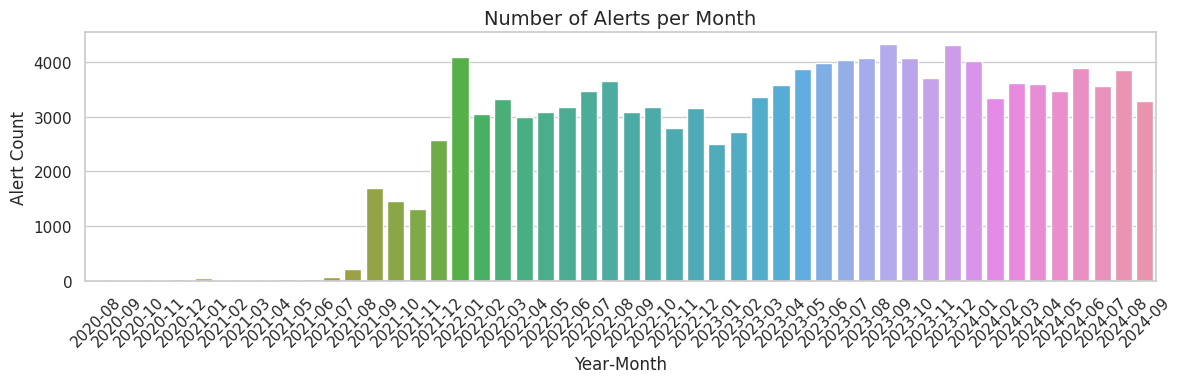

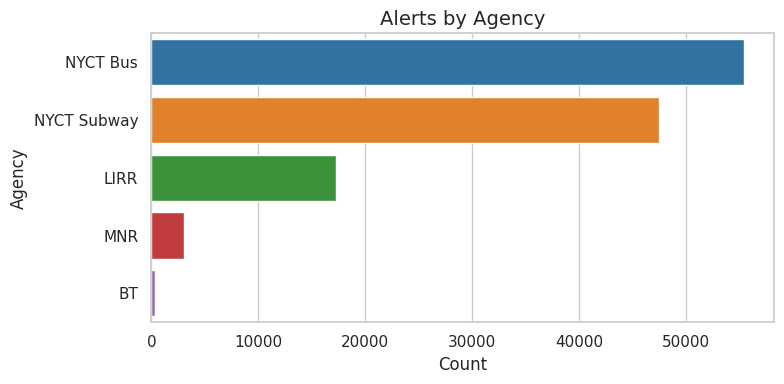

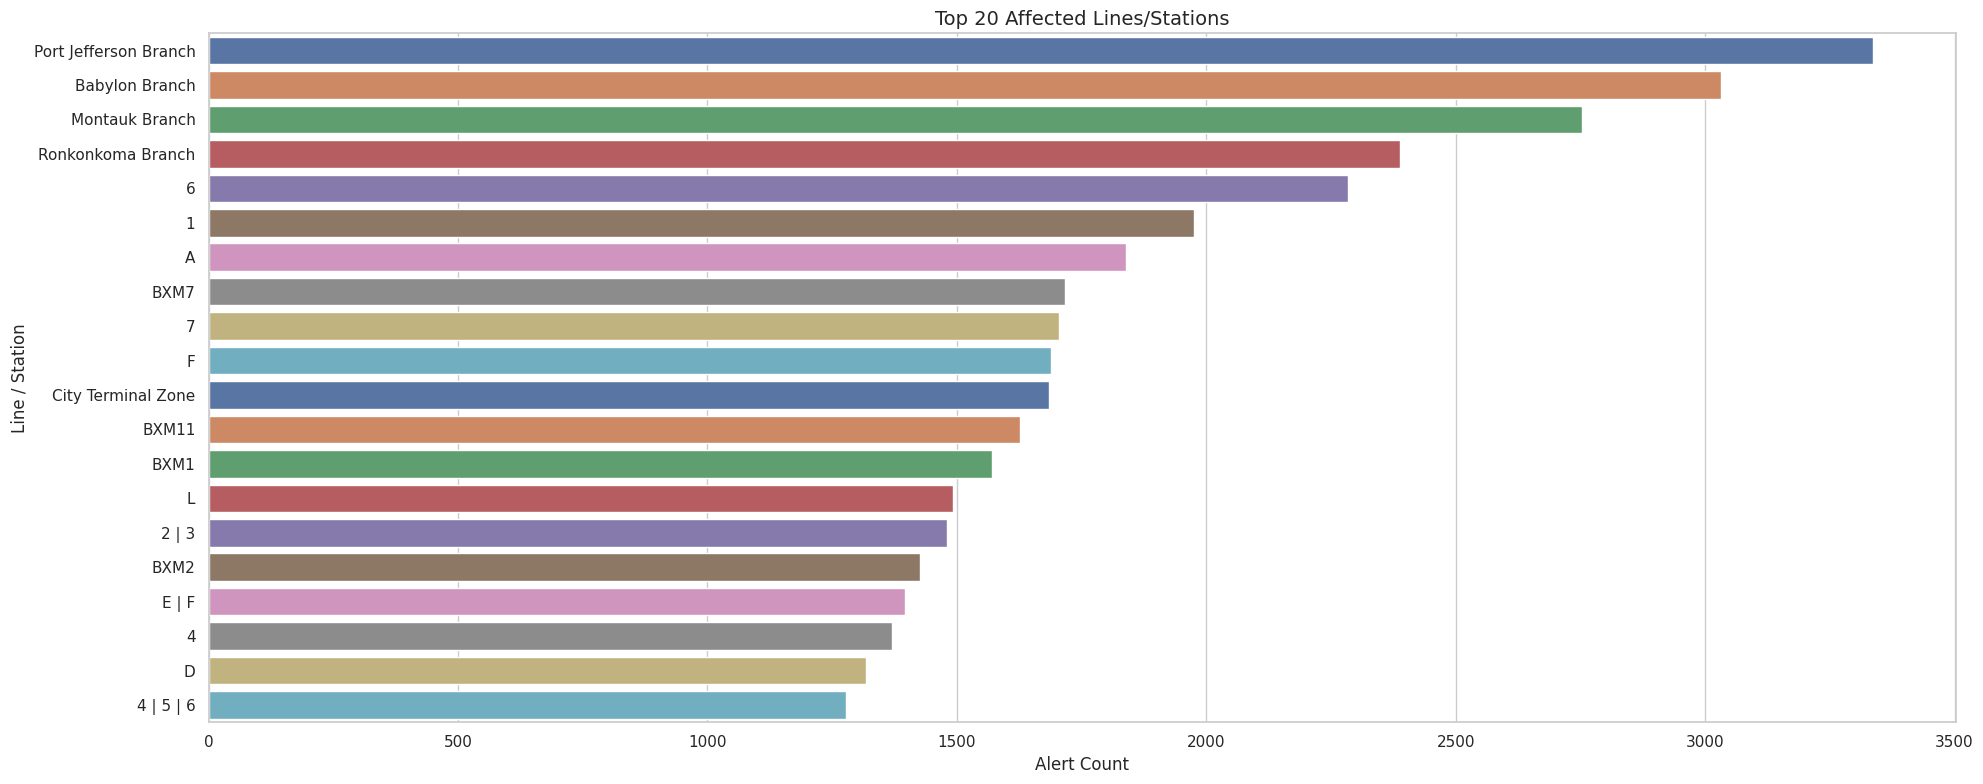

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


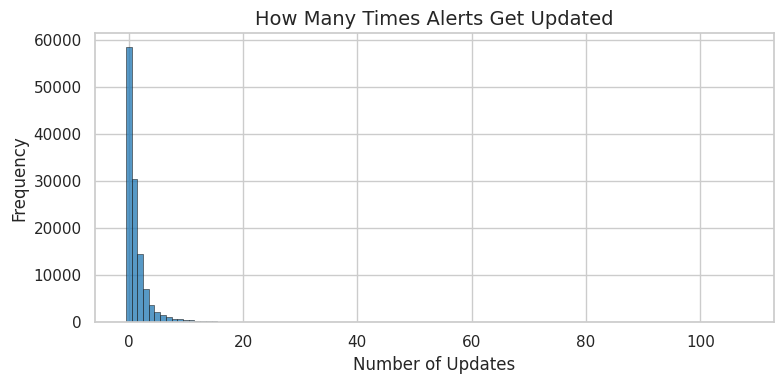

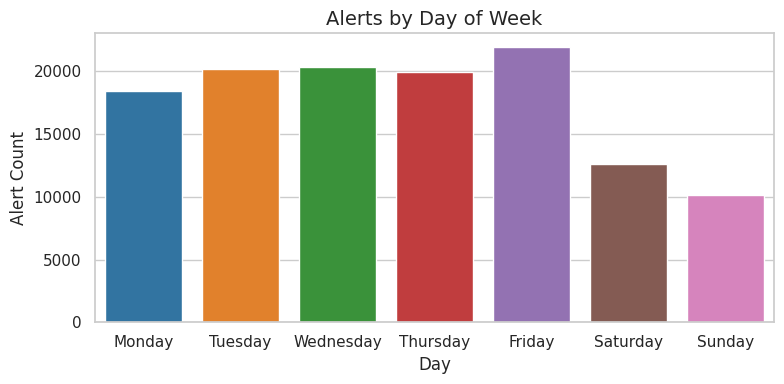

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# ——————————————————————————————————————————————
# 0️⃣  Setup style
# ——————————————————————————————————————————————
sns.set_theme(style="whitegrid", palette="tab10")
plt.rc("axes", titlesize=14, labelsize=12)

# ——————————————————————————————————————————————
# 1️⃣  Load & initial inspect
# ——————————————————————————————————————————————
df_alerts = dataframes['MTA_Service_Alerts__Beginning_April_2020'].copy()

print("First 5 rows:")
display(df_alerts.head())

print("\nDataFrame Info:")
print(df_alerts.info())

print("\nSummary statistics:")
print(df_alerts.describe(include='all'))

# ——————————————————————————————————————————————
# 2️⃣  Clean & type conversions
# ——————————————————————————————————————————————
# Drop rows missing Description
df_alerts.dropna(subset=['Description'], inplace=True)

# Parse dates
df_alerts['Date'] = pd.to_datetime(df_alerts['Date'], errors='coerce')
df_alerts.dropna(subset=['Date'], inplace=True)

# Normalize status label
df_alerts['Status Label'] = df_alerts['Status Label'].str.strip().str.lower()

# Fill missing Affected
df_alerts['Affected'] = df_alerts['Affected'].fillna('Unknown')

# Remove duplicate Alert IDs
dups = df_alerts.duplicated(subset=['Alert ID']).sum()
if dups:
    df_alerts.drop_duplicates(subset=['Alert ID'], inplace=True)

# ——————————————————————————————————————————————
# 3️⃣  Feature engineering
# ——————————————————————————————————————————————
# Year‑Month for trend
df_alerts['year_month']  = df_alerts['Date'].dt.to_period('M').astype(str)
# Day of week
df_alerts['day_of_week'] = df_alerts['Date'].dt.day_name()
# Hour of day
df_alerts['hour']        = df_alerts['Date'].dt.hour

# Compute how many updates each alert got
updates = df_alerts.groupby('Alert ID')['Update Number'].max()
df_alerts = df_alerts.merge(
    updates.rename('num_updates').reset_index(),
    on='Alert ID'
)

# ——————————————————————————————————————————————
# 4️⃣  Missingness overview
# ——————————————————————————————————————————————
plt.figure(figsize=(10,3))
msno.matrix(df_alerts)
plt.title("Missing‑Data Matrix: Service Alerts")
plt.show()

print("\nMissing values per column:")
print(df_alerts.isna().sum())

# ——————————————————————————————————————————————
# 5️⃣  Visualizations
# ——————————————————————————————————————————————

# 5.1 Alerts per month
plt.figure(figsize=(12,4))
sns.countplot(
    data=df_alerts,
    x='year_month',
    order=sorted(df_alerts['year_month'].unique())
)
plt.xticks(rotation=45)
plt.title("Number of Alerts per Month")
plt.xlabel("Year‑Month")
plt.ylabel("Alert Count")
plt.tight_layout()
plt.show()

# 5.2 Alerts by agency
plt.figure(figsize=(8,4))
sns.countplot(
    data=df_alerts,
    y='Agency',
    order=df_alerts['Agency'].value_counts().index
)
plt.title("Alerts by Agency")
plt.xlabel("Count")
plt.ylabel("Agency")
plt.tight_layout()
plt.show()




# 5.4 Top 10 affected lines/stations
top_aff = df_alerts['Affected'].value_counts().head(20)
plt.figure(figsize=(20,8))
sns.barplot(
    x=top_aff.values,
    y=top_aff.index,
    palette="deep"
)
plt.title("Top 20 Affected Lines/Stations")
plt.xlabel("Alert Count")
plt.ylabel("Line / Station")
plt.tight_layout()
plt.show()

# 5.5 Distribution of update counts
plt.figure(figsize=(8,4))
sns.histplot(
    df_alerts['num_updates'],
    bins=range(df_alerts['num_updates'].max()+2),
    discrete=True,
    edgecolor='k'
)
plt.title("How Many Times Alerts Get Updated")
plt.xlabel("Number of Updates")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 5.6 Alerts by day of week
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(8,4))
sns.countplot(
    data=df_alerts,
    x='day_of_week',
    order=order
)
plt.title("Alerts by Day of Week")
plt.xlabel("Day")
plt.ylabel("Alert Count")
plt.tight_layout()
plt.show()


In [18]:
# Check for duplicates based on 'Alert ID' or combination of relevant columns
num_duplicates = df_alerts.duplicated(subset=['Alert ID']).sum()
print(f"\nNumber of Duplicate Alert IDs: {num_duplicates}")

# Remove duplicates if any
if num_duplicates > 0:
    df_alerts.drop_duplicates(subset=['Alert ID'], inplace=True)
    print(f"Removed {num_duplicates} duplicate alerts based on 'Alert ID'")



Number of Duplicate Alert IDs: 0


First 5 rows:


,Complex ID,Is Complex,Number Of Stations In Complex,Stop Name,Display Name,Constituent Station Names,Station IDs,GTFS Stop IDs,Borough,CBD,Daytime Routes,Structure Type,Latitude,Longitude,ADA,ADA Notes
0,1,False,1,Astoria-Ditmars Blvd,Astoria-Ditmars Blvd (N W),Astoria-Ditmars Blvd,1,R01,Q,False,N W,Elevated,40.775036,-73.912034,0,NaN
1,2,False,1,Astoria Blvd,Astoria Blvd (N W),Astoria Blvd,2,R03,Q,False,N W,Elevated,40.770258,-73.917843,1,NaN
2,3,False,1,30 Av,30 Av (N W),30 Av,3,R04,Q,False,N W,Elevated,40.766779,-73.921479,0,NaN
3,4,False,1,Broadway,Broadway (N W),Broadway,4,R05,Q,False,N W,Elevated,40.761820,-73.925508,0,NaN
4,5,False,1,36 Av,36 Av (N W),36 Av,5,R06,Q,False,N W,Elevated,40.756804,-73.929575,0,NaN



Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Complex ID                     445 non-null    int64  
 1   Is Complex                     445 non-null    bool   
 2   Number Of Stations In Complex  445 non-null    int64  
 3   Stop Name                      445 non-null    object 
 4   Display Name                   445 non-null    object 
 5   Constituent Station Names      445 non-null    object 
 6   Station IDs                    445 non-null    object 
 7   GTFS Stop IDs                  445 non-null    object 
 8   Borough                        445 non-null    object 
 9   CBD                            445 non-null    bool   
 10  Daytime Routes                 445 non-null    object 
 11  Structure Type                 445 non-null    object 
 12  Latitude                       44

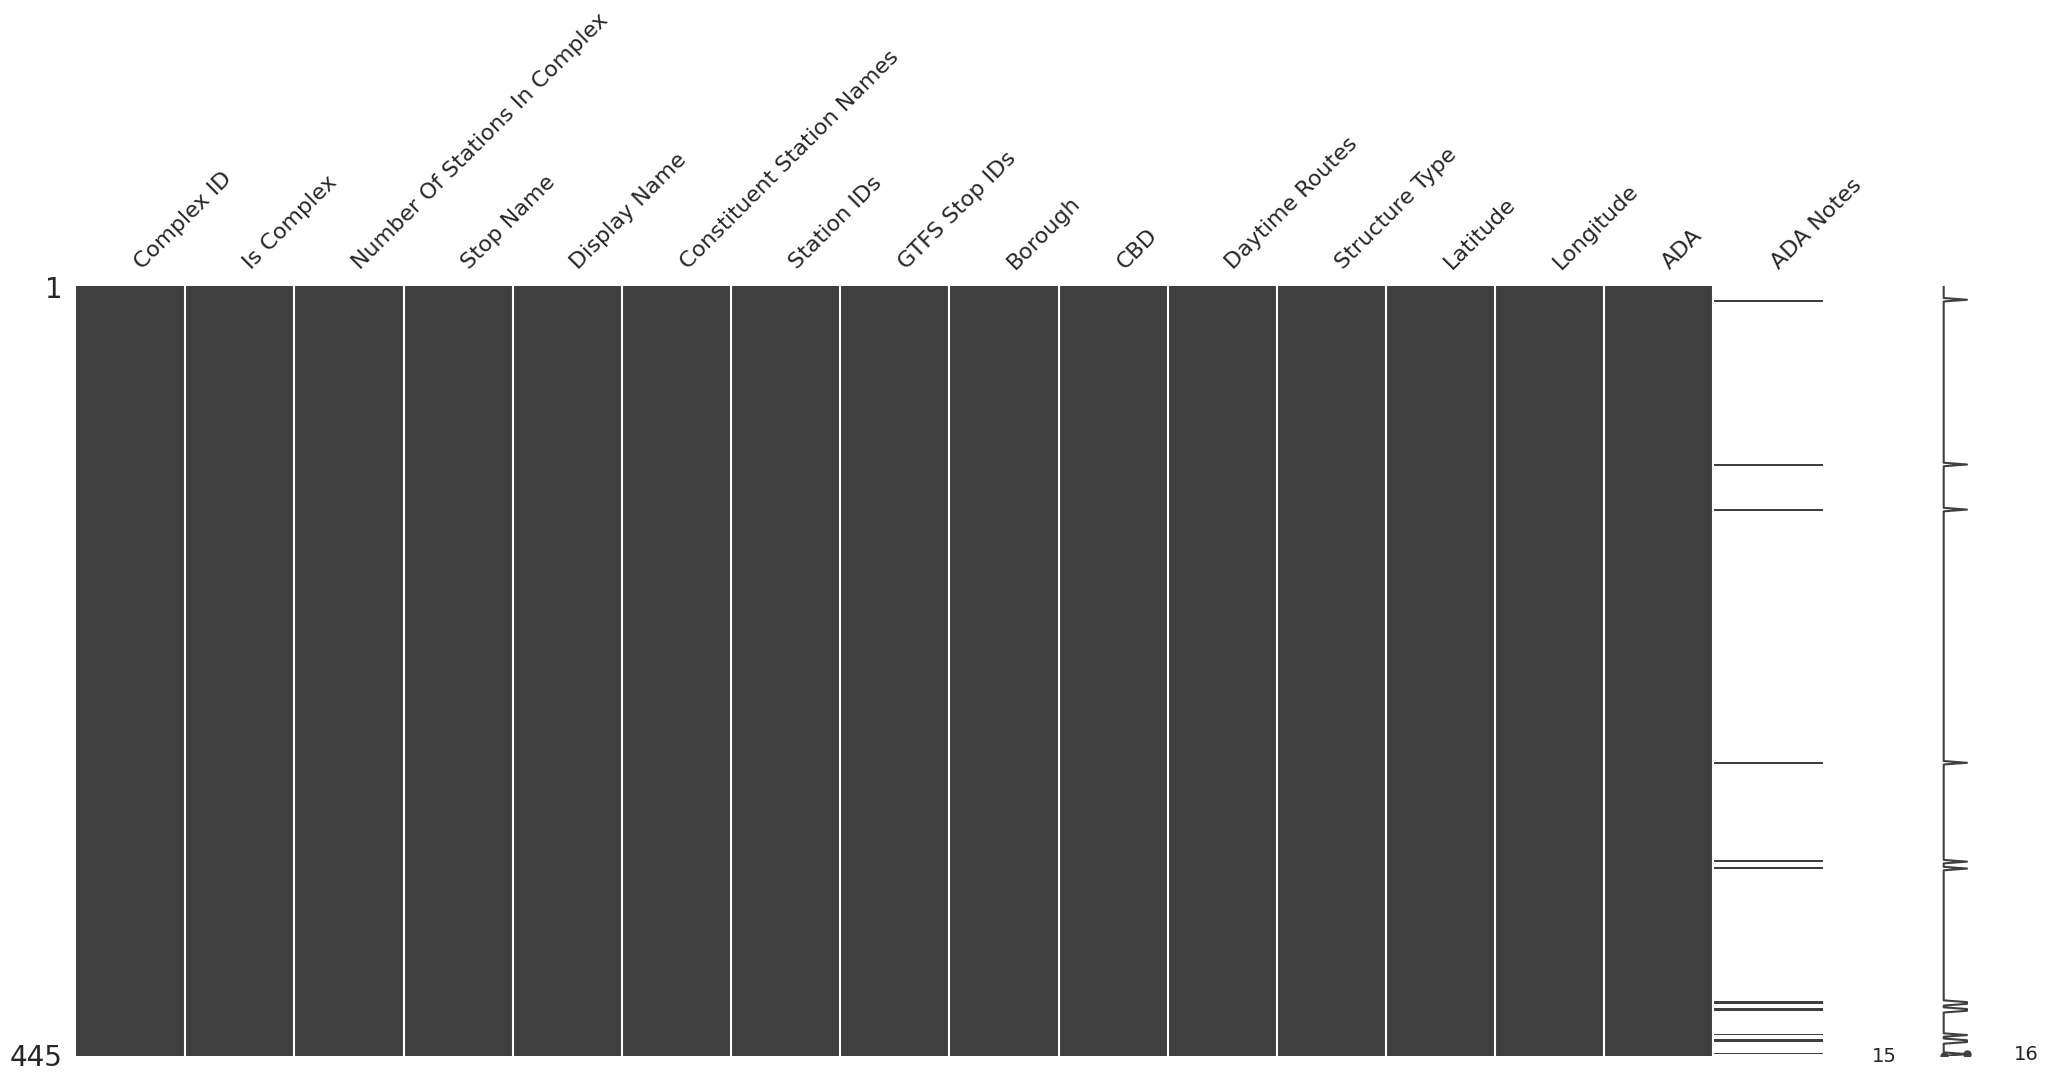

['Queens' 'Manhattan' 'Brooklyn' 'Bronx' 'SI']

Missing Values per Column:
Complex ID                         0
Is Complex                         0
Number Of Stations In Complex      0
Stop Name                          0
Display Name                       0
Constituent Station Names          0
Station IDs                        0
GTFS Stop IDs                      0
Borough                            0
CBD                                0
Daytime Routes                     0
Structure Type                     0
Latitude                           0
Longitude                          0
ADA                                0
ADA Notes                        431
dtype: int64
Filled missing 'ADA Notes' with 'No Notes'

Data Types Before Conversion:
Complex ID                         int64
Is Complex                          bool
Number Of Stations In Complex      int64
Stop Name                         object
Display Name                      object
Constituent Station Names         object


/tmp/ipykernel_30/3962937941.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_stations['ADA Notes'].fillna('No Notes', inplace=True)


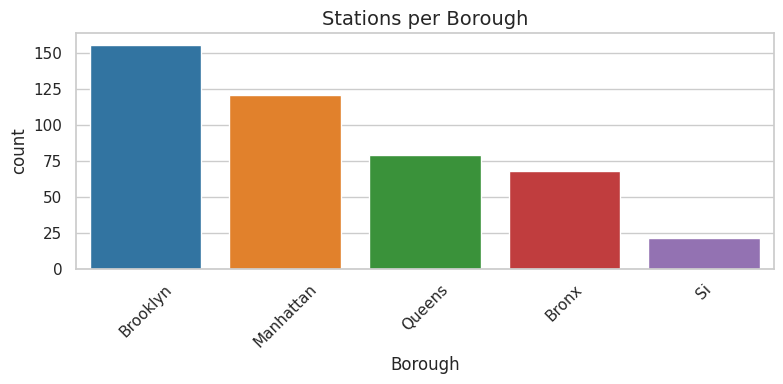

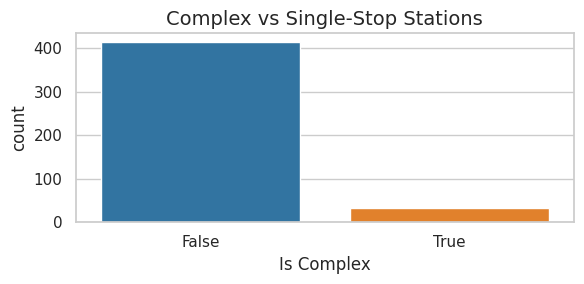

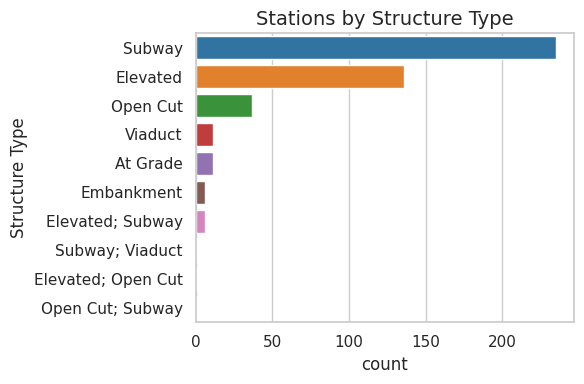

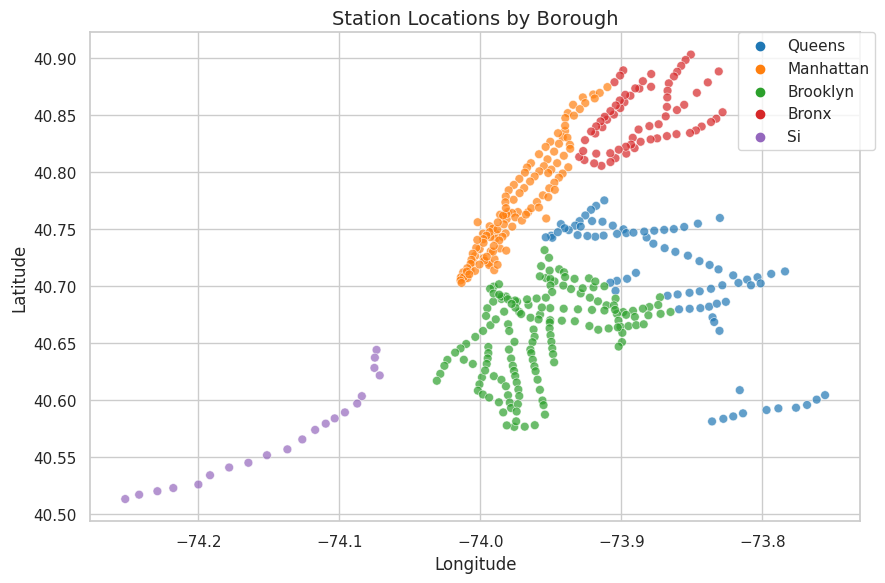

In [19]:
# Access the dataframe
df_stations = dataframes['MTA_Subway_Stations_and_Complexes']

# Display the first few rows
print("First 5 rows:")
display(df_stations.head())

# Get dataframe info
print("\nDataframe Info:")
print(df_stations.info())

# Summary statistics
print("\nSummary Statistics:")
print(df_stations.describe(include='all'))

# Visualize missing values
msno.matrix(df_stations)
plt.show()

borough_map = {
    'Q':  'Queens',
    'M':  'Manhattan',
    'Bk':  'Brooklyn',
    'Bx':  'Bronx',
    'Si': 'Staten Island'
}

# 3) Replace in place
df_stations['Borough'] = df_stations['Borough'].replace(borough_map)

# 4) Verify
print(df_stations['Borough'].unique())
# → ['Queens','Manhattan','Brooklyn','Bronx','Staten Island']

# Summary of missing values
print("\nMissing Values per Column:")
print(df_stations.isnull().sum())

# Example: Filling missing 'ADA Notes' with 'No Notes'
if df_stations['ADA Notes'].isnull().sum() > 0:
    df_stations['ADA Notes'].fillna('No Notes', inplace=True)
    print("Filled missing 'ADA Notes' with 'No Notes'")

# Check current data types
print("\nData Types Before Conversion:")
print(df_stations.dtypes)

# Convert 'Latitude' and 'Longitude' to numeric (float)
df_stations['Latitude'] = pd.to_numeric(df_stations['Latitude'], errors='coerce')
df_stations['Longitude'] = pd.to_numeric(df_stations['Longitude'], errors='coerce')

# Verify conversion
print("\nData Types After Conversion:")
print(df_stations.dtypes)

# Handle any NaN in 'Latitude' and 'Longitude'
num_lat_nan = df_stations['Latitude'].isnull().sum()
num_lon_nan = df_stations['Longitude'].isnull().sum()
print(f"\nNumber of NaN in 'Latitude': {num_lat_nan}")
print(f"Number of NaN in 'Longitude': {num_lon_nan}")

# Drop rows with missing coordinates
if num_lat_nan > 0 or num_lon_nan > 0:
    df_stations.dropna(subset=['Latitude', 'Longitude'], inplace=True)
    print(f"Dropped {num_lat_nan + num_lon_nan} rows with missing coordinates")

# Check for duplicates based on 'GTFS Stop ID'
num_duplicates = df_stations.duplicated(subset=['GTFS Stop IDs']).sum()
print(f"\nNumber of Duplicate GTFS Stop IDs: {num_duplicates}")

# Remove duplicates if any
if num_duplicates > 0:
    df_stations.drop_duplicates(subset=['GTFS Stop ID'], inplace=True)
    print(f"Removed {num_duplicates} duplicate stations based on 'GTFS Stop ID'")

# Example: Capitalize borough names
df_stations['Borough'] = df_stations['Borough'].str.title()

# Example: Convert 'ADA' to categorical
df_stations['ADA'] = df_stations['ADA'].apply(lambda x: 'Yes' if x == 1 else 'No')

# 4) Stations per borough
plt.figure(figsize=(8,4))
sns.countplot(data=df_stations, x='Borough',
              order=df_stations['Borough'].value_counts().index)
plt.title("Stations per Borough")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




# 6) Complex vs. single‑stop
plt.figure(figsize=(6,3))
sns.countplot(data=df_stations, x='Is Complex')
plt.title("Complex vs Single‑Stop Stations")
plt.tight_layout()
plt.show()


# 8) Structure type breakdown
plt.figure(figsize=(6,4))
sns.countplot(data=df_stations, y='Structure Type',
              order=df_stations['Structure Type'].value_counts().index)
plt.title("Stations by Structure Type")
plt.tight_layout()
plt.show()

# 9) Geospatial scatter
plt.figure(figsize=(9,6))
sns.scatterplot(data=df_stations, x='Longitude', y='Latitude',
                hue='Borough', s=40, alpha=0.7, edgecolor='w')
plt.title("Station Locations by Borough")
plt.legend(bbox_to_anchor=(1.02,1), borderaxespad=0)
plt.tight_layout()
plt.show()


In [20]:
# Define a directory to save cleaned data
cleaned_data_dir = "/kaggle/working/cleaned_data/"
os.makedirs(cleaned_data_dir, exist_ok=True)

# Save each cleaned dataframe as a CSV
df_ridership.to_csv(os.path.join(cleaned_data_dir, "cleaned_MTA_Subway_Hourly_Ridership.csv"), index=False)
df_od.to_csv(os.path.join(cleaned_data_dir, "cleaned_MTA_Subway_Origin-Destination_Ridership_Estimate.csv"), index=False)
df_alerts.to_csv(os.path.join(cleaned_data_dir, "cleaned_MTA_Service_Alerts.csv"), index=False)
df_stations.to_csv(os.path.join(cleaned_data_dir, "cleaned_MTA_Subway_Stations_and_Complexes.csv"), index=False)

print("Cleaned dataframes have been saved successfully.")

Cleaned dataframes have been saved successfully.


In [21]:
print(df_ridership.columns)
print(df_stations.columns)
print(df_od.columns)
print(df_alerts.columns)

Index(['transit_timestamp', 'transit_mode', 'station_complex_id',
       'station_complex', 'borough', 'payment_method', 'fare_class_category',
       'ridership', 'transfers', 'latitude', 'longitude', 'Georeference',
       'hour', 'date', 'day_of_week', 'is_weekend'],
      dtype='object')
Index(['Complex ID', 'Is Complex', 'Number Of Stations In Complex',
       'Stop Name', 'Display Name', 'Constituent Station Names', 'Station IDs',
       'GTFS Stop IDs', 'Borough', 'CBD', 'Daytime Routes', 'Structure Type',
       'Latitude', 'Longitude', 'ADA', 'ADA Notes'],
      dtype='object')
Index(['Year', 'Month', 'Day of Week', 'Hour of Day', 'Timestamp',
       'Origin Station Complex ID', 'Origin Station Complex Name',
       'Origin Latitude', 'Origin Longitude', 'Destination Station Complex ID',
       'Destination Station Complex Name', 'Destination Latitude',
       'Destination Longitude', 'Estimated Average Ridership', 'Origin Point',
       'Destination Point', 'date', 'year', 'm

In [22]:
# Rename 'Complex ID' to 'station_complex_id' in df_stations to match df_ridership
df_stations.rename(columns={'Complex ID': 'station_complex_id'}, inplace=True)

# Convert 'station_complex_id' to string in both DataFrames to ensure compatibility
df_ridership['station_complex_id'] = df_ridership['station_complex_id'].astype(str)
df_stations['station_complex_id'] = df_stations['station_complex_id'].astype(str)

# Perform the merge
df_ridership = df_ridership.merge(
    df_stations,
    how='left',
    on='station_complex_id',  # Merge on the corrected column name
    suffixes=('', '_station')
)

# Verify the result
print(f"After merging with stations: {df_ridership.shape}")
print(df_ridership.head())


After merging with stations: (1054764, 31)
    transit_timestamp transit_mode station_complex_id    station_complex  \
0 2024-04-02 09:00:00       subway                429   Freeman St (2,5)   
1 2024-03-27 23:00:00       subway                271  Steinway St (M,R)   
2 2024-03-07 16:00:00       subway                268        65 St (M,R)   
3 2024-03-20 05:00:00       subway                118           3 Av (L)   
4 2024-03-27 19:00:00       subway                306         125 St (1)   

     borough payment_method               fare_class_category  ridership  \
0      Bronx      metrocard       Metrocard - Unlimited 7-Day         13   
1     Queens      metrocard       Metrocard - Unlimited 7-Day         12   
2     Queens      metrocard  Metrocard - Seniors & Disability          2   
3  Manhattan           omny                  OMNY - Full Fare          4   
4  Manhattan      metrocard       Metrocard - Unlimited 7-Day         14   

   transfers   latitude  ...  Station IDs G

In [23]:
# Convert 'Origin Station Complex ID' and 'Destination Station Complex ID' to string
df_od['Origin Station Complex ID'] = df_od['Origin Station Complex ID'].astype(str)
df_od['Destination Station Complex ID'] = df_od['Destination Station Complex ID'].astype(str)

# Convert 'station_complex_id' to string in df_stations (if not already)
df_stations['station_complex_id'] = df_stations['station_complex_id'].astype(str)

# Merge OD data with station metadata for origin and destination
df_od = df_od.merge(
    df_stations,
    how='left',
    left_on='Origin Station Complex ID',
    right_on='station_complex_id',
    suffixes=('_origin', '_station')
).merge(
    df_stations,
    how='left',
    left_on='Destination Station Complex ID',
    right_on='station_complex_id',
    suffixes=('_origin', '_destination')
)

# Verify the merge
print(f"After merging OD with stations: {df_od.shape}")
print(df_od.head())


After merging OD with stations: (762945, 53)
   Year  Month Day of Week  Hour of Day           Timestamp  \
0  2024      1     Tuesday           12 2024-01-09 12:00:00   
1  2024      1     Tuesday           17 2024-01-09 17:00:00   
2  2024      1     Tuesday            9 2024-01-09 09:00:00   
3  2024      1     Tuesday            8 2024-01-09 08:00:00   
4  2024      1     Tuesday           17 2024-01-09 17:00:00   

  Origin Station Complex ID Origin Station Complex Name  Origin Latitude  \
0                       475                   96 St (Q)        40.784318   
1                        13                 28 St (R,W)        40.745494   
2                       258             Briarwood (E,F)        40.709179   
3                        66                   18 Av (D)        40.607954   
4                       269         Northern Blvd (M,R)        40.752885   

   Origin Longitude Destination Station Complex ID  ...  \
0        -73.947152                            312  ...   
1

In [24]:
# Ensure 'transit_timestamp' is in datetime format
df_ridership['transit_timestamp'] = pd.to_datetime(df_ridership['transit_timestamp'])

# Extract date from 'transit_timestamp'
df_ridership['alert_date'] = df_ridership['transit_timestamp'].dt.date

# Extract affected station names from alerts
# Assuming 'Affected' contains station names or lines; this may require parsing based on data specifics
# For simplicity, let's assume it contains 'Stop Name'

# Create a mapping of dates to affected stations
alerts_mapping = df_alerts.groupby('Date')['Affected'].apply(list).reset_index()

# Convert to a dictionary for faster lookup
alerts_dict = pd.to_datetime(alerts_mapping['Date']).dt.date.tolist(), alerts_mapping['Affected'].tolist()

date_to_affected = dict(zip(alerts_dict[0], alerts_dict[1]))

# Define a function to flag alerts
def flag_alerts(row):
    affected_stations = date_to_affected.get(row['alert_date'], [])
    if row['Stop Name'] in affected_stations:
        return 1
    else:
        return 0

# Apply the flag function
df_ridership['is_alert'] = df_ridership.apply(flag_alerts, axis=1)

# Print the result
print(f"After flagging alerts: {df_ridership.shape}")
print(df_ridership.head())


After flagging alerts: (1054764, 33)
    transit_timestamp transit_mode station_complex_id    station_complex  \
0 2024-04-02 09:00:00       subway                429   Freeman St (2,5)   
1 2024-03-27 23:00:00       subway                271  Steinway St (M,R)   
2 2024-03-07 16:00:00       subway                268        65 St (M,R)   
3 2024-03-20 05:00:00       subway                118           3 Av (L)   
4 2024-03-27 19:00:00       subway                306         125 St (1)   

     borough payment_method               fare_class_category  ridership  \
0      Bronx      metrocard       Metrocard - Unlimited 7-Day         13   
1     Queens      metrocard       Metrocard - Unlimited 7-Day         12   
2     Queens      metrocard  Metrocard - Seniors & Disability          2   
3  Manhattan           omny                  OMNY - Full Fare          4   
4  Manhattan      metrocard       Metrocard - Unlimited 7-Day         14   

   transfers   latitude  ...    Borough    CBD  D

In [25]:
# For modeling ridership at each station and timestamp, we'll use df_ridership enriched with station info and alert flags

# Example: Adding OD ridership as features
# Aggregate OD ridership by destination station and timestamp
df_od['Hour'] = df_od['Timestamp'].dt.hour
df_od['Date'] = df_od['Timestamp'].dt.date

# Aggregate estimated average ridership to match ridership dataframe
df_od_agg = df_od.groupby(['Date', 'Hour', 'Destination Station Complex Name'])['Estimated Average Ridership'].sum().reset_index()
df_od_agg.rename(columns={'Destination Station Complex Name': 'Stop Name', 'Estimated Average Ridership': 'OD_ridership'}, inplace=True)

# Merge with ridership dataframe
df_master = df_ridership.merge(
    df_od_agg,
    how='left',
    left_on=['alert_date', df_ridership['transit_timestamp'].dt.hour, 'Stop Name'],
    right_on=['Date', 'Hour', 'Stop Name'],
    suffixes=('', '_OD')
)

# Fill NaN OD_ridership with 0 (assuming no OD ridership if not present)
df_master['OD_ridership'].fillna(0, inplace=True)

# Drop unnecessary columns
df_master.drop(['Date', 'Hour'], axis=1, inplace=True)

# Verify the master dataframe
print(f"Master dataframe shape: {df_master.shape}")
print(df_master.head())


/tmp/ipykernel_30/261853851.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_master['OD_ridership'].fillna(0, inplace=True)


Master dataframe shape: (1054764, 34)
    transit_timestamp transit_mode station_complex_id    station_complex  \
0 2024-04-02 09:00:00       subway                429   Freeman St (2,5)   
1 2024-03-27 23:00:00       subway                271  Steinway St (M,R)   
2 2024-03-07 16:00:00       subway                268        65 St (M,R)   
3 2024-03-20 05:00:00       subway                118           3 Av (L)   
4 2024-03-27 19:00:00       subway                306         125 St (1)   

     borough payment_method               fare_class_category  ridership  \
0      Bronx      metrocard       Metrocard - Unlimited 7-Day         13   
1     Queens      metrocard       Metrocard - Unlimited 7-Day         12   
2     Queens      metrocard  Metrocard - Seniors & Disability          2   
3  Manhattan           omny                  OMNY - Full Fare          4   
4  Manhattan      metrocard       Metrocard - Unlimited 7-Day         14   

   transfers   latitude  ...    CBD Daytime Rout

In [26]:
# Check for any NaN values in key merged columns
print(df_master[['Stop Name', 'station_complex_id', 'OD_ridership']].isnull().sum())

Stop Name             4024
station_complex_id       0
OD_ridership             0
dtype: int64


In [27]:
# Verify that ridership data aligns with station metadata
print(df_master[['Stop Name', 'station_complex_id']].drop_duplicates().head())

     Stop Name station_complex_id
0   Freeman St                429
1  Steinway St                271
2        65 St                268
3         3 Av                118
4       125 St                306


In [28]:
# Compare a sample of records with original datasets to ensure accuracy
sample_record = df_master.iloc[0]
print("Sample Record:")
print(sample_record)

Sample Record:
transit_timestamp                        2024-04-02 09:00:00
transit_mode                                          subway
station_complex_id                                       429
station_complex                             Freeman St (2,5)
borough                                                Bronx
payment_method                                     metrocard
fare_class_category              Metrocard - Unlimited 7-Day
ridership                                                 13
transfers                                                  0
latitude                                           40.829994
longitude                                          -73.89187
Georeference                     POINT (-73.89187 40.829994)
hour                                                       9
date                                              2024-04-02
day_of_week                                          Tuesday
is_weekend                                             False
Is Comple

In [29]:
# Convert 'transit_timestamp' to datetime if not already
df_master['transit_timestamp'] = pd.to_datetime(df_master['transit_timestamp'])

# Extract temporal features
df_master['hour'] = df_master['transit_timestamp'].dt.hour
df_master['day_of_week'] = df_master['transit_timestamp'].dt.dayofweek  # Monday=0, Sunday=6
df_master['month'] = df_master['transit_timestamp'].dt.month
df_master['is_weekend'] = df_master['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

In [30]:
# Sort the dataframe by station and timestamp
df_master.sort_values(by=['station_complex_id', 'transit_timestamp'], inplace=True)

# Create lag features (e.g., ridership 1 hour ago, 2 hours ago)
df_master['ridership_lag_1'] = df_master.groupby('station_complex_id')['ridership'].shift(1)
df_master['ridership_lag_2'] = df_master.groupby('station_complex_id')['ridership'].shift(2)

# Handle NaN values in lag features (e.g., fill with median or previous values)
df_master['ridership_lag_1'].fillna(df_master['ridership'].median(), inplace=True)
df_master['ridership_lag_2'].fillna(df_master['ridership'].median(), inplace=True)

/tmp/ipykernel_30/1375277742.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_master['ridership_lag_1'].fillna(df_master['ridership'].median(), inplace=True)
/tmp/ipykernel_30/1375277742.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met

In [31]:
# Calculate rolling mean and standard deviation over the past 3 hours
df_master['ridership_roll_mean_3'] = df_master.groupby('station_complex_id')['ridership'].shift(1).rolling(window=3).mean()
df_master['ridership_roll_std_3'] = df_master.groupby('station_complex_id')['ridership'].shift(1).rolling(window=3).std()

# Fill NaN values
df_master['ridership_roll_mean_3'].fillna(df_master['ridership'].median(), inplace=True)
df_master['ridership_roll_std_3'].fillna(0, inplace=True)  # If no variation, std dev is 0

/tmp/ipykernel_30/2324077199.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_master['ridership_roll_mean_3'].fillna(df_master['ridership'].median(), inplace=True)
/tmp/ipykernel_30/2324077199.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

In [32]:
# Check column names in the dataframe
print(df_master.columns)

# Adjust categorical columns based on actual column names
categorical_cols = ['Borough', 'Line', 'Status Label']  # Adjust based on actual columns in the output

# Ensure the columns exist before applying one-hot encoding
missing_cols = [col for col in categorical_cols if col not in df_master.columns]
if missing_cols:
    print(f"Warning: The following columns are missing from df_master: {missing_cols}")
    categorical_cols = [col for col in categorical_cols if col in df_master.columns]  # Remove missing columns

# Apply One-Hot Encoding (only on existing columns)
df_master = pd.get_dummies(df_master, columns=categorical_cols, drop_first=True)

# Print the updated dataframe
print(df_master.head())

Index(['transit_timestamp', 'transit_mode', 'station_complex_id',
       'station_complex', 'borough', 'payment_method', 'fare_class_category',
       'ridership', 'transfers', 'latitude', 'longitude', 'Georeference',
       'hour', 'date', 'day_of_week', 'is_weekend', 'Is Complex',
       'Number Of Stations In Complex', 'Stop Name', 'Display Name',
       'Constituent Station Names', 'Station IDs', 'GTFS Stop IDs', 'Borough',
       'CBD', 'Daytime Routes', 'Structure Type', 'Latitude', 'Longitude',
       'ADA', 'ADA Notes', 'alert_date', 'is_alert', 'OD_ridership', 'month',
       'ridership_lag_1', 'ridership_lag_2', 'ridership_roll_mean_3',
       'ridership_roll_std_3'],
      dtype='object')
         transit_timestamp transit_mode station_complex_id  \
879291 2020-07-03 07:00:00       subway                  1   
873845 2020-07-03 13:00:00       subway                  1   
881288 2020-07-04 13:00:00       subway                  1   
889290 2020-07-05 19:00:00       subway    

In [33]:
from geopy.distance import geodesic
import pandas as pd

# Example: Calculate distance to a central point (e.g., Times Square)
central_point = (40.7580, -73.9855)  # Latitude and Longitude of Times Square

# Check for missing or invalid coordinates (e.g., NaN or out-of-range values)
df_master['Latitude'] = pd.to_numeric(df_master['Latitude'], errors='coerce')
df_master['Longitude'] = pd.to_numeric(df_master['Longitude'], errors='coerce')

# Filter out rows with invalid coordinates (NaN or out-of-range values) in-place
valid_coordinates = (
    (df_master['Latitude'].notna()) &
    (df_master['Longitude'].notna()) &
    (df_master['Latitude'] >= -90) &
    (df_master['Latitude'] <= 90) &
    (df_master['Longitude'] >= -180) &
    (df_master['Longitude'] <= 180)
)

# Directly calculate the distance for valid rows without creating a separate DataFrame
df_master.loc[valid_coordinates, 'distance_to_central'] = df_master.loc[valid_coordinates].apply(
    lambda row: geodesic((row['Latitude'], row['Longitude']), central_point).meters,
    axis=1
)

# Verify the result
print(df_master[['Latitude', 'Longitude', 'distance_to_central']].head())


         Latitude  Longitude  distance_to_central
879291  40.775036 -73.912034          6484.922368
873845  40.775036 -73.912034          6484.922368
881288  40.775036 -73.912034          6484.922368
889290  40.775036 -73.912034          6484.922368
862356  40.775036 -73.912034          6484.922368


In [34]:
print(df_master.columns.tolist())


['transit_timestamp', 'transit_mode', 'station_complex_id', 'station_complex', 'borough', 'payment_method', 'fare_class_category', 'ridership', 'transfers', 'latitude', 'longitude', 'Georeference', 'hour', 'date', 'day_of_week', 'is_weekend', 'Is Complex', 'Number Of Stations In Complex', 'Stop Name', 'Display Name', 'Constituent Station Names', 'Station IDs', 'GTFS Stop IDs', 'CBD', 'Daytime Routes', 'Structure Type', 'Latitude', 'Longitude', 'ADA', 'ADA Notes', 'alert_date', 'is_alert', 'OD_ridership', 'month', 'ridership_lag_1', 'ridership_lag_2', 'ridership_roll_mean_3', 'ridership_roll_std_3', 'Borough_Brooklyn', 'Borough_Manhattan', 'Borough_Queens', 'Borough_Si', 'distance_to_central']


In [35]:
# Save without the pandas-generated index column
df_master.to_csv('master_df.csv', index=False)


In [36]:
print(df_master[['Latitude', 'Longitude', 'distance_to_central']].count())

Latitude               1050740
Longitude              1050740
distance_to_central    1050740
dtype: int64


In [37]:
# Example: Interaction between hour and day of week
df_master['hour_day_interaction'] = df_master['hour'] * df_master['day_of_week']

# Example: Interaction between is_alert and ridership_lag_1
df_master['alert_ridership_interaction'] = df_master['is_alert'] * df_master['ridership_lag_1']

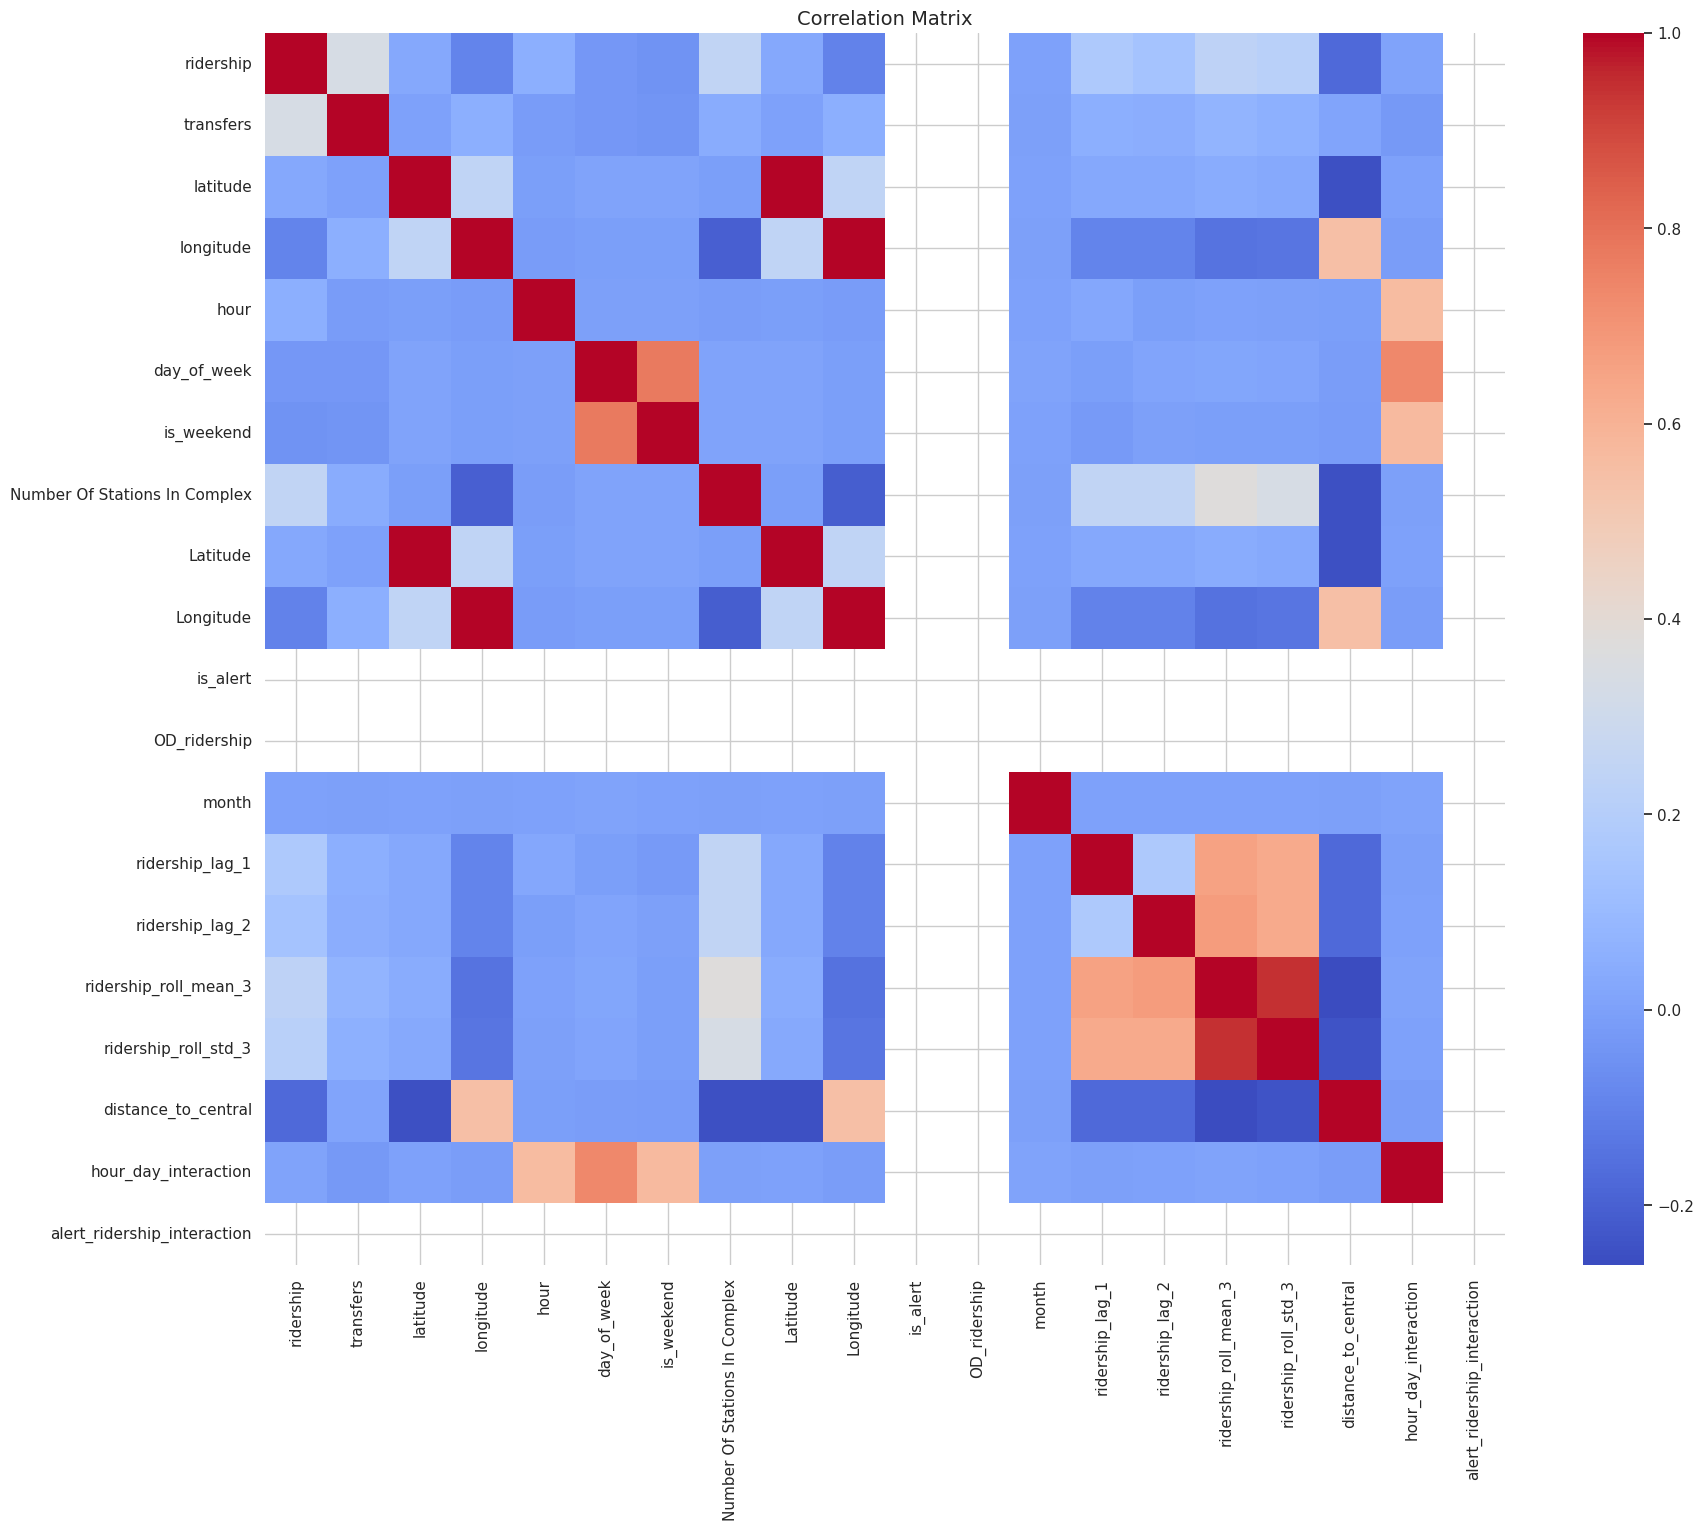

Features to drop due to high correlation: ['Latitude', 'Longitude', 'ridership_roll_std_3']


In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_master is already loaded

# Select only numeric columns for correlation calculation
numeric_columns = df_master.select_dtypes(include=[np.number]).columns

# Compute correlation matrix on numeric columns only
corr_matrix = df_master[numeric_columns].corr()

# Plot heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Identify highly correlated features
threshold = 0.8
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print(f"Features to drop due to high correlation: {to_drop}")

# Drop highly correlated features
df_master.drop(columns=to_drop, inplace=True)

In [39]:
from sklearn.model_selection import train_test_split

# Sort the dataframe by timestamp
df_master.sort_values(by='transit_timestamp', inplace=True)

# Define features and target
X = df_master.drop(['ridership', 'transit_timestamp'], axis=1)
y = df_master['ridership']

# Determine split date (e.g., last 10% of data for testing)
split_ratio = 0.9
split_index = int(len(df_master) * split_ratio)

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")


Training set: (949287, 40), (949287,)
Testing set: (105477, 40), (105477,)


In [40]:
from sklearn.preprocessing import StandardScaler

# Identify numerical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform it
X_train.loc[:, numerical_features] = scaler.fit_transform(X_train[numerical_features])

# Transform testing data using the same scaler
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])


/tmp/ipykernel_30/3533430284.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.16078184 -0.16078184 -0.16078184 ... -0.06396301 -0.16078184
 -0.16078184]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_features] = scaler.fit_transform(X_train[numerical_features])
/tmp/ipykernel_30/3533430284.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.58751072 -0.58751072 -0.58751072 ... -0.58751072 -0.58751072
 -0.58751072]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_features] = scaler.fit_transform(X_train[numerical_features])
/tmp/ipykernel_30/3533430284.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.16078184 -0.16078184 -

In [41]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode categorical features
for col in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))

# Initialize XGBoost Regressor with GPU Support
xgb_model = xgb.XGBRegressor(
    objective="reg:squarederror",   # Regression objective
    tree_method="gpu_hist",         # GPU accelerated method
    predictor="gpu_predictor",      # Use GPU for inference
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6
)

# Train the Model
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric="rmse",
    early_stopping_rounds=50,
    verbose=100
)

# Predict and Evaluate
y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print Results
print(f"XGBoost MAE: {mae:.4f}")
print(f"XGBoost RMSE: {rmse:.4f}")


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:46:46] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:46:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used

[0]	validation_0-rmse:121.61936
[100]	validation_0-rmse:60.42165
[200]	validation_0-rmse:54.41715
[300]	validation_0-rmse:51.44121
[400]	validation_0-rmse:49.39031
[500]	validation_0-rmse:48.08784
[600]	validation_0-rmse:46.92954
[700]	validation_0-rmse:45.76391
[800]	validation_0-rmse:45.05021
[900]	validation_0-rmse:44.26517
[999]	validation_0-rmse:43.74459


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:47:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:47:08] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


XGBoost MAE: 14.9007
XGBoost RMSE: 43.7446


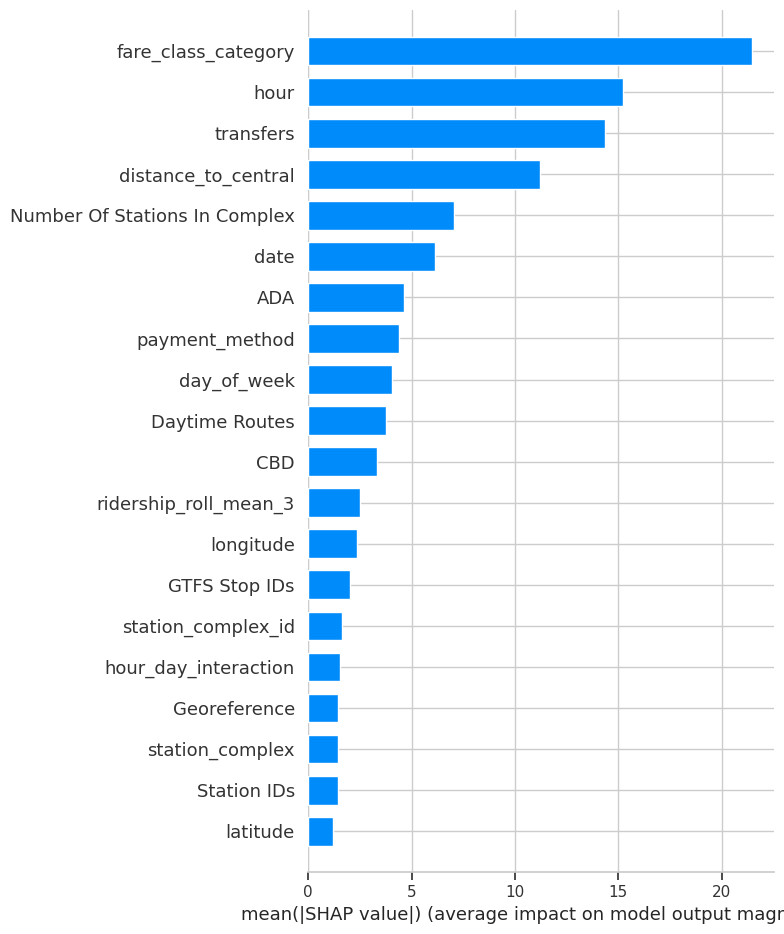

In [42]:
import shap

# Initialize SHAP explainer for XGBoost
explainer = shap.TreeExplainer(xgb_model)  # Use trained XGBoost model
shap_values = explainer.shap_values(X_test)

# Plot feature importance (global interpretation)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Detailed feature impact for an individual prediction
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :])


In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb

# Example Dataset (California Housing)
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)  # Convert y to Pandas Series

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Cross-Validation Process
for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    print(f"Fold {fold + 1}")

    # Split the data
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

    # Train XGBoost Model
    model = xgb.XGBRegressor(
        objective="reg:squarederror",
        tree_method="gpu_hist",  # Use GPU
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        random_state=42
    )

    model.fit(X_train_cv, y_train_cv, eval_set=[(X_test_cv, y_test_cv)],
              eval_metric="rmse", early_stopping_rounds=50, verbose=100)

    # Evaluate the Model
    y_pred_cv = model.predict(X_test_cv)
    mae = mean_absolute_error(y_test_cv, y_pred_cv)
    rmse = mean_squared_error(y_test_cv, y_pred_cv, squared=False)

    print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}\n")


Fold 1
[0]	validation_0-rmse:1.50050


`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[15:47:28] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"



[100]	validation_0-rmse:1.27155
[200]	validation_0-rmse:1.21852
[300]	validation_0-rmse:1.20448
[400]	validation_0-rmse:1.19633
[499]	validation_0-rmse:1.19440
MAE: 0.8827, RMSE: 1.1938

Fold 2
[0]	validation_0-rmse:1.11604


[15:47:29] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[15:47:29] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"



[100]	validation_0-rmse:0.59672
[200]	validation_0-rmse:0.59376
[300]	validation_0-rmse:0.59073
[339]	validation_0-rmse:0.59153
MAE: 0.4201, RMSE: 0.5906

Fold 3
[0]	validation_0-rmse:1.01417


[15:47:29] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[15:47:29] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"



[100]	validation_0-rmse:0.61791
[125]	validation_0-rmse:0.61953
MAE: 0.4174, RMSE: 0.6168

Fold 4
[0]	validation_0-rmse:1.21669


[15:47:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[15:47:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"



[100]	validation_0-rmse:0.83470
[137]	validation_0-rmse:0.83327
MAE: 0.5791, RMSE: 0.8289

Fold 5
[0]	validation_0-rmse:1.12879


[15:47:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[15:47:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"



[100]	validation_0-rmse:0.57861
[200]	validation_0-rmse:0.55902
[300]	validation_0-rmse:0.55476
[357]	validation_0-rmse:0.55767
MAE: 0.3865, RMSE: 0.5547



[15:47:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"



In [44]:
from sklearn.metrics import r2_score

# Evaluate R² Score
r2 = r2_score(y_test_cv, y_pred_cv)
print(f"XGBoost R²: {r2:.4f}")


XGBoost R²: 0.7727


use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


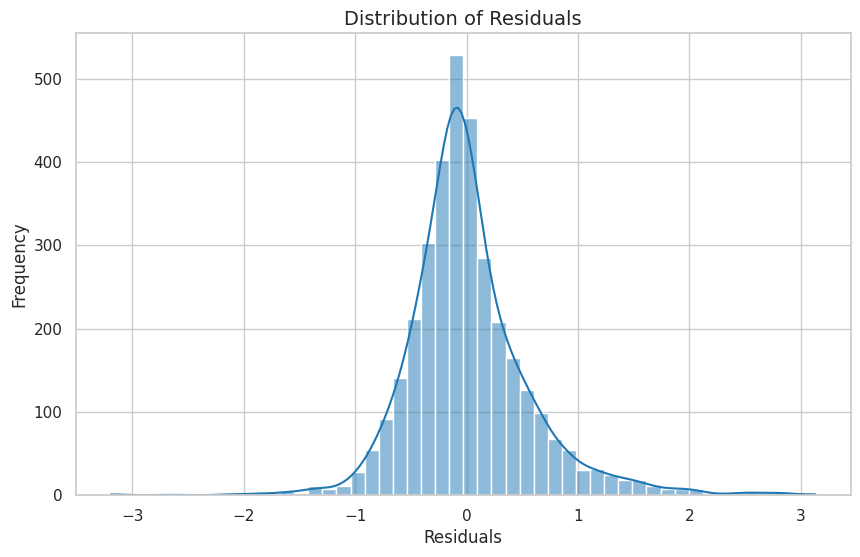

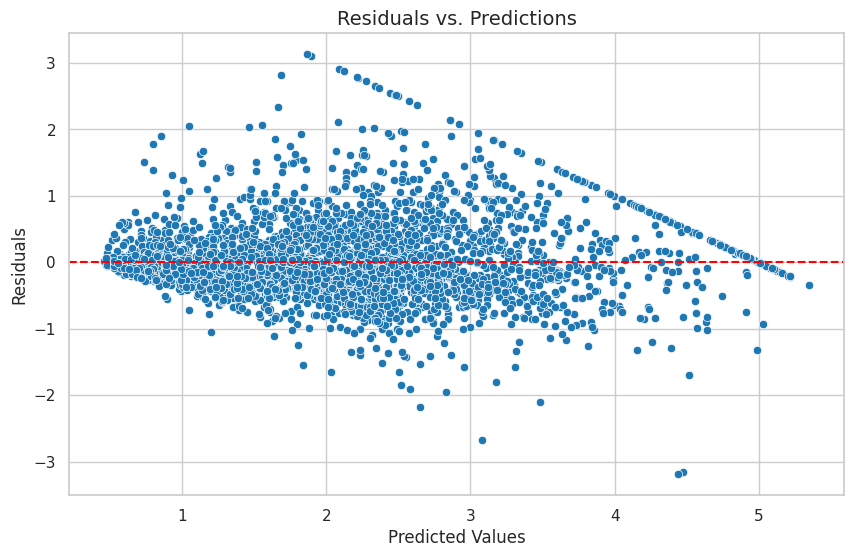

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Residuals
residuals = y_test_cv - y_pred_cv

# Plot Residual Distribution
plt.figure(figsize=(10,6))
sns.histplot(residuals, bins=50, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Residuals vs Predictions Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred_cv, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predictions')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


In [46]:
import joblib

# Save the trained XGBoost model
joblib.dump(xgb_model, '/kaggle/working/xgb_real_time_model.pkl')
print("Model saved successfully!")

# Load the saved model (for future inference)
loaded_model = joblib.load('/kaggle/working/xgb_real_time_model.pkl')
print("Model loaded successfully!")


Model saved successfully!
Model loaded successfully!
